In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv('sample_data/witcher_network.csv')
df.head()

Unnamed: 0   Source   Target        Type  Weight  book
0           0  Velerad   Geralt  Undirected       1     1
1           1   Geralt  Foltest  Undirected       5     1
2           2  Foltest   Geralt  Undirected       4     1
3           3     Adda   Geralt  Undirected       1     1
4           4   Geralt   Ostrit  Undirected       4     1

## Pre processing

In [5]:
# remove unuseful columns
df = df.drop(labels='Unnamed: 0', axis=1)
df = df.drop(labels='Type', axis=1)
df = df.rename(columns={'book': 'Book'})

df

Source     Target  Weight  Book
0       Velerad     Geralt       1     1
1        Geralt    Foltest       5     1
2       Foltest     Geralt       4     1
3          Adda     Geralt       1     1
4        Geralt     Ostrit       4     1
...         ...        ...     ...   ...
2595      Lytta       Ciri       2     7
2596      Lytta      Triss       1     7
2597      Triss  Dandelion       1     7
2598      Triss     Yarpen       1     7
2599  Dandelion     Mistle       1     7

[2600 rows x 4 columns]

In [6]:
# sort in lexicographical order Source and Target
df['Source'], df['Target'] = zip(*df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# groupby: Among rows with same Source, Target and Book select the one with largest weight
df_proc = df.groupby(['Source', 'Target', 'Book']).agg({'Weight': 'max'}).reset_index()

In [7]:
# save dataframe in csv
df_proc.to_csv('df_grouped.csv', index=False)
print(df_proc.shape)
print(df.shape)

(1770, 4)
(2600, 4)


In [8]:
df_proc

Source     Target  Book  Weight
0       Adalia       Anna     5       1
1       Adalia     Assire     5       2
2       Adalia   Calanthe     5       1
3       Adalia  Francesca     5       1
4       Adalia  Margarita     5       1
...        ...        ...   ...     ...
1765    Yarpen   Yennefer     3       1
1766    Yarpen   Yennefer     4       2
1767    Yarpen     Zoltan     7       8
1768  Yennefer      Yurga     2       1
1769  Yennefer     Zoltan     7       1

[1770 rows x 4 columns]

## Graph

In [9]:
# subgraphs for all 7 books

df_book1 = df_proc[df_proc['Book']==1]
df_book2 = df_proc[df_proc['Book']==2]
df_book3 = df_proc[df_proc['Book']==3]
df_book4 = df_proc[df_proc['Book']==4]
df_book5 = df_proc[df_proc['Book']==5]
df_book6 = df_proc[df_proc['Book']==6]
df_book7 = df_proc[df_proc['Book']==7]

In [10]:
# Create a graph from the dataframe
G_1 = nx.from_pandas_edgelist(df_book1, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(df_book2, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(df_book3, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(df_book4, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(df_book5, 'Source', 'Target', edge_attr=True)
G_6 = nx.from_pandas_edgelist(df_book6, 'Source', 'Target', edge_attr=True)
G_7 = nx.from_pandas_edgelist(df_book7, 'Source', 'Target', edge_attr=True)


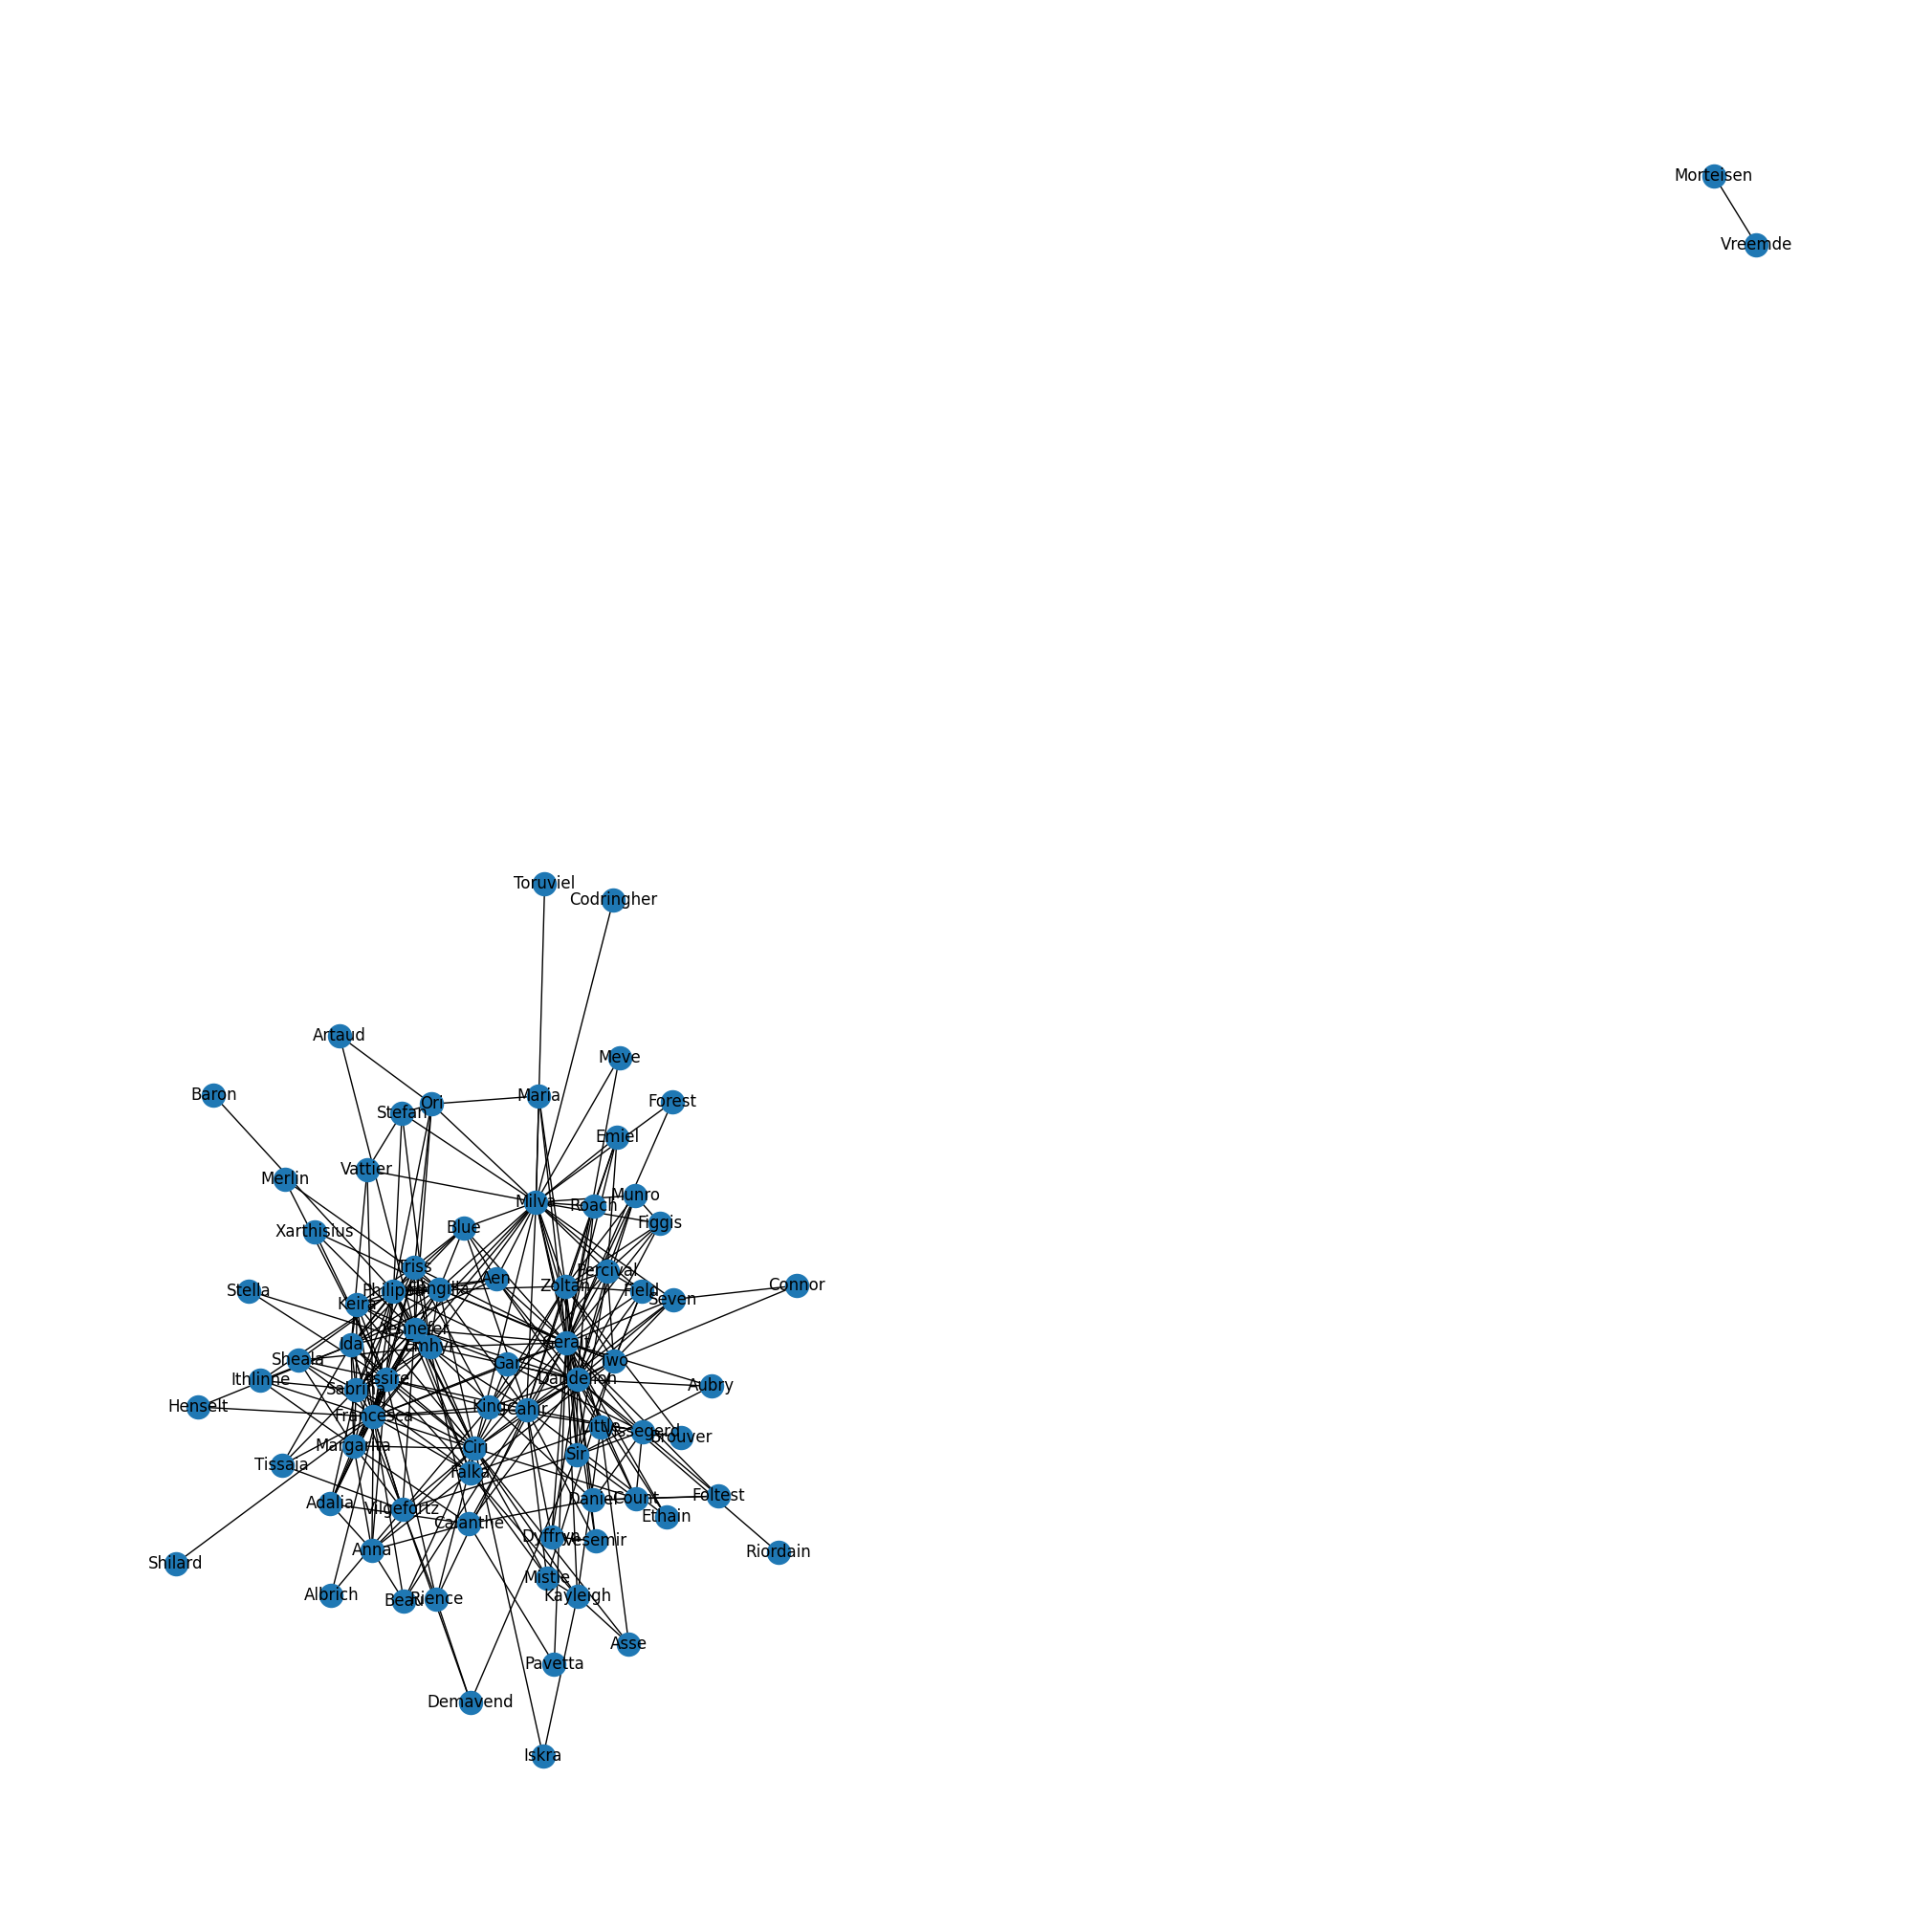

In [11]:
# Draw the graph
plt.figure(figsize=(20, 20))
nx.draw(G_5, with_labels=True)
plt.show()

In [12]:
# Create a DataFrame for nodes
df_nodes1 = pd.DataFrame(G_1.nodes(), columns=['Nodes'])
df_nodes2 = pd.DataFrame(G_2.nodes(), columns=['Nodes'])
df_nodes3 = pd.DataFrame(G_3.nodes(), columns=['Nodes'])
df_nodes4 = pd.DataFrame(G_4.nodes(), columns=['Nodes'])
df_nodes5 = pd.DataFrame(G_5.nodes(), columns=['Nodes'])
df_nodes6 = pd.DataFrame(G_6.nodes(), columns=['Nodes'])
df_nodes7 = pd.DataFrame(G_7.nodes(), columns=['Nodes'])


print("Nodes of graph G_1:")
print(df_nodes1)

Nodes of graph G_1:
          Nodes
0          Adda
1       Foltest
2        Geralt
3           Aen
4   Filavandrel
..          ...
62       Little
63     Nivellen
64        Roach
65      Vereena
66        Ravix

[67 rows x 1 columns]


In [13]:
# Create a DataFrame for edges
df_edges1 = pd.DataFrame(list(G_1.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges2 = pd.DataFrame(list(G_2.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges3 = pd.DataFrame(list(G_3.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges4 = pd.DataFrame(list(G_4.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges5 = pd.DataFrame(list(G_5.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges6 = pd.DataFrame(list(G_6.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges7 = pd.DataFrame(list(G_7.edges(data=True)), columns=['Source', 'Target', 'Attributes'])


print("Edges of graph G_1:")
print(df_edges1)


Edges of graph G_1:
       Source   Target                Attributes
0        Adda  Foltest  {'Book': 1, 'Weight': 1}
1        Adda   Geralt  {'Book': 1, 'Weight': 2}
2     Foltest   Geralt  {'Book': 1, 'Weight': 5}
3     Foltest   Ostrit  {'Book': 1, 'Weight': 1}
4     Foltest      Two  {'Book': 1, 'Weight': 1}
..        ...      ...                       ...
172     Field   Torque  {'Book': 1, 'Weight': 1}
173    Torque   Galarr  {'Book': 1, 'Weight': 3}
174    Ostrit  Velerad  {'Book': 1, 'Weight': 1}
175  Nivellen  Vereena  {'Book': 1, 'Weight': 2}
176     Roach  Vereena  {'Book': 1, 'Weight': 2}

[177 rows x 3 columns]


In [14]:
# Save nodes DataFrame to a CSV file
#df_nodes.to_csv('nodes.csv', index=False)

# Save edges DataFrame to a CSV file
#df_edges.to_csv('edges.csv', index=False)

## Measures

#### Degree

In [15]:
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_6 = nx.degree_centrality(G_6)
degree_7 = nx.degree_centrality(G_7)

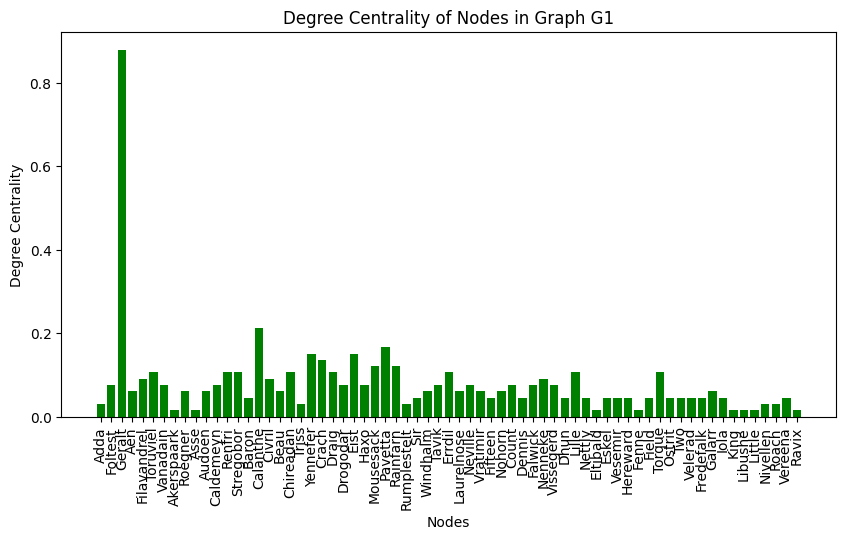

In [16]:
# book1
degree_nodes_1 = degree_1.keys()
degree_centralities_1 = degree_1.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_1, degree_centralities_1, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

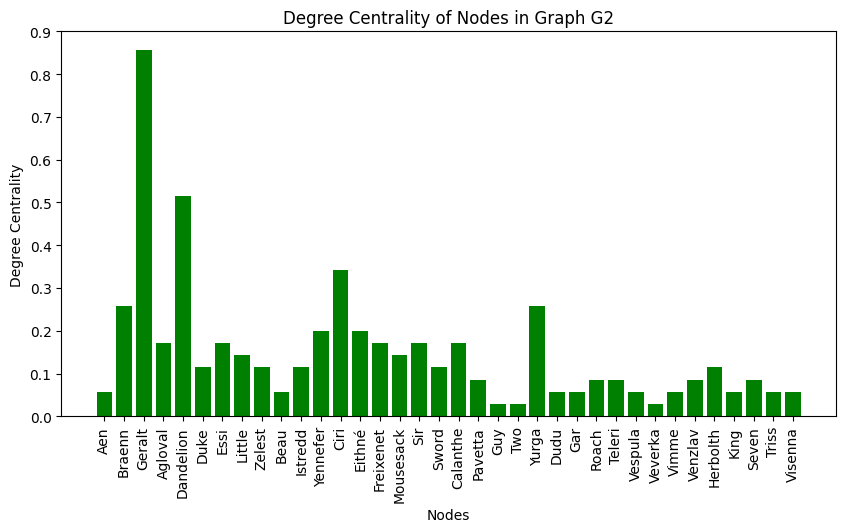

In [17]:
# book2
degree_nodes_2 = degree_2.keys()
degree_centralities_2 = degree_2.values()


plt.figure(figsize=(10,5))
plt.bar(degree_nodes_2, degree_centralities_2, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

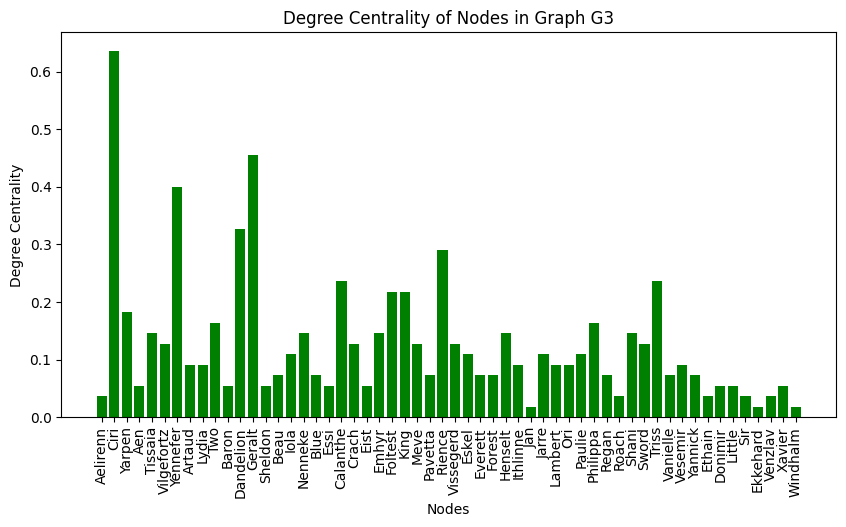

In [18]:
# book3
degree_nodes_3 = degree_3.keys()
degree_centralities_3= degree_3.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_3, degree_centralities_3, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

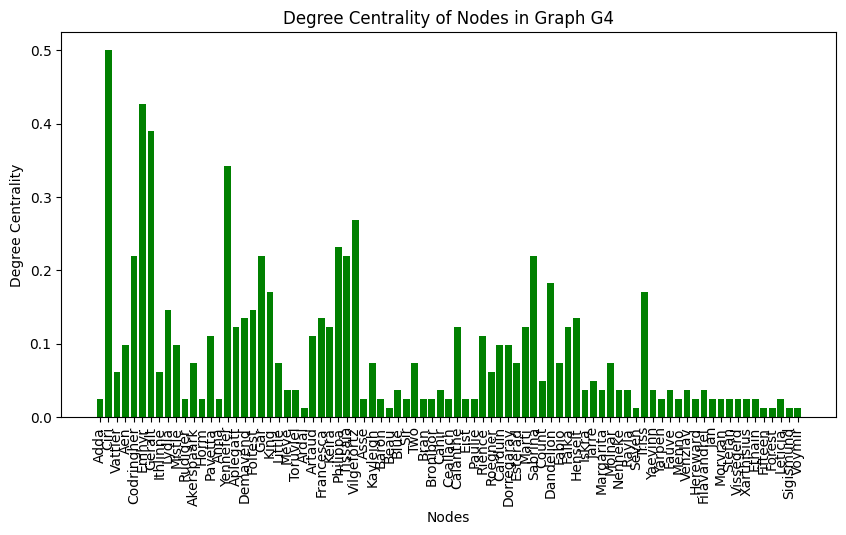

In [19]:
# book4
degree_nodes_4 = degree_4.keys()
degree_centralities_4= degree_4.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_4, degree_centralities_4, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

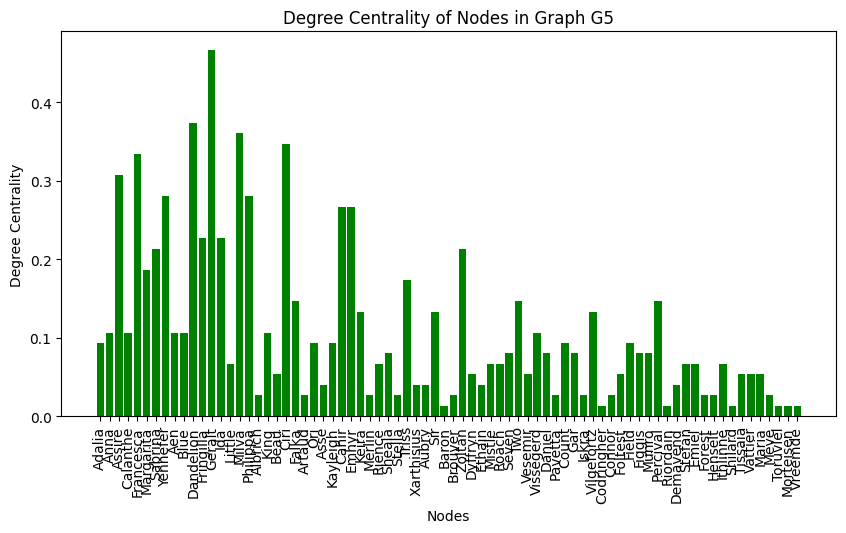

In [20]:
# book5
degree_nodes_5 = degree_5.keys()
degree_centralities_5= degree_5.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_5, degree_centralities_5, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

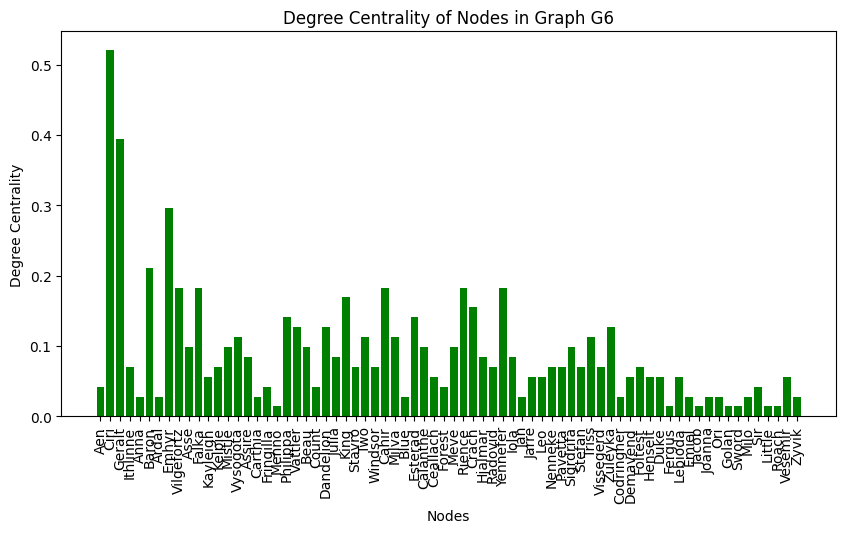

In [21]:
# book6
degree_nodes_6 = degree_6.keys()
degree_centralities_6 = degree_6.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_6, degree_centralities_6, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

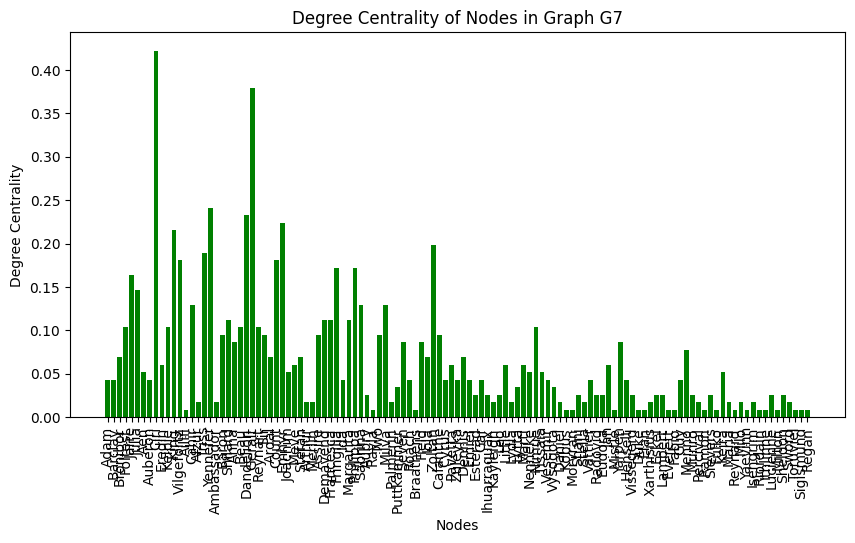

In [22]:
# book7
degree_nodes_7 = degree_7.keys()
degree_centralities_7= degree_7.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_7, degree_centralities_7, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes
threshold = 0.15

high_degree_nodes_1 = [node for node, deg in degree_1.items() if deg > threshold]
high_degree_nodes_2 = [node for node, deg in degree_2.items() if deg > threshold]
high_degree_nodes_3 = [node for node, deg in degree_3.items() if deg > threshold]
high_degree_nodes_4 = [node for node, deg in degree_4.items() if deg > threshold]
high_degree_nodes_5 = [node for node, deg in degree_5.items() if deg > threshold]
high_degree_nodes_6 = [node for node, deg in degree_6.items() if deg > threshold]
high_degree_nodes_7 = [node for node, deg in degree_7.items() if deg > threshold]

print("Graph 1 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_1)
print("Graph 2 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_2)
print("Graph 3 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_3)
print("Graph 4 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_4)
print("Graph 5 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_5)
print("Graph 6 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_6)
print("Graph 7 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_7)


Graph 1 - Nodes with degree centrality above  0.15 :  ['Geralt', 'Calanthe', 'Yennefer', 'Eist', 'Pavetta']
Graph 2 - Nodes with degree centrality above  0.15 :  ['Braenn', 'Geralt', 'Agloval', 'Dandelion', 'Essi', 'Yennefer', 'Ciri', 'Eithné', 'Freixenet', 'Sir', 'Calanthe', 'Yurga']
Graph 3 - Nodes with degree centrality above  0.15 :  ['Ciri', 'Yarpen', 'Yennefer', 'Two', 'Dandelion', 'Geralt', 'Calanthe', 'Foltest', 'King', 'Rience', 'Philippa', 'Triss']
Graph 4 - Nodes with degree centrality above  0.15 :  ['Ciri', 'Codringher', 'Emhyr', 'Geralt', 'Yennefer', 'Gar', 'King', 'Philippa', 'Tissaia', 'Vilgefortz', 'Sabrina', 'Dandelion', 'Triss']
Graph 5 - Nodes with degree centrality above  0.15 :  ['Assire', 'Francesca', 'Margarita', 'Sabrina', 'Yennefer', 'Dandelion', 'Fringilla', 'Geralt', 'Ida', 'Milva', 'Philippa', 'Ciri', 'Cahir', 'Emhyr', 'Triss', 'Zoltan']
Graph 6 - Nodes with degree centrality above  0.15 :  ['Ciri', 'Geralt', 'Baron', 'Emhyr', 'Vilgefortz', 'Falka', 'King',

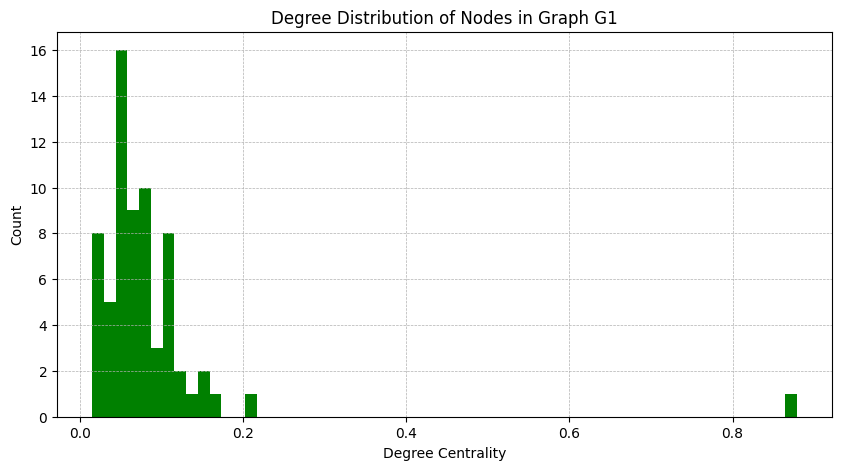

In [26]:
# BOOK 1
degree_values = list(degree_1.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=60, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

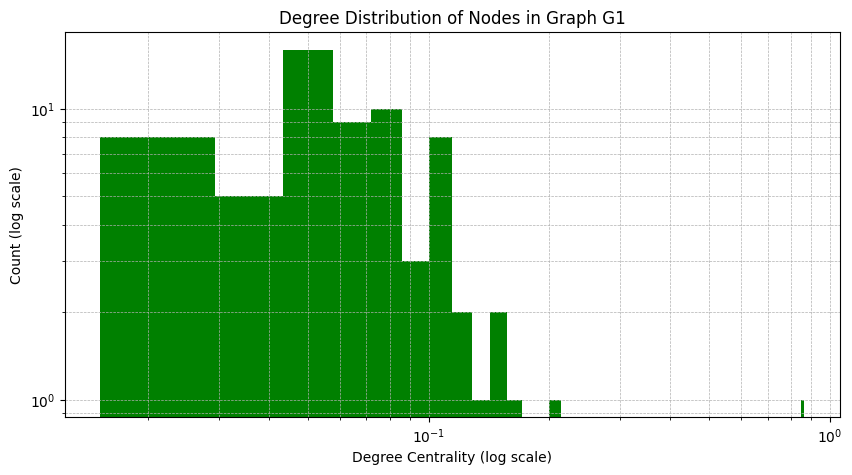

In [ ]:
degree_values = list(degree_1.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=60)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=60, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


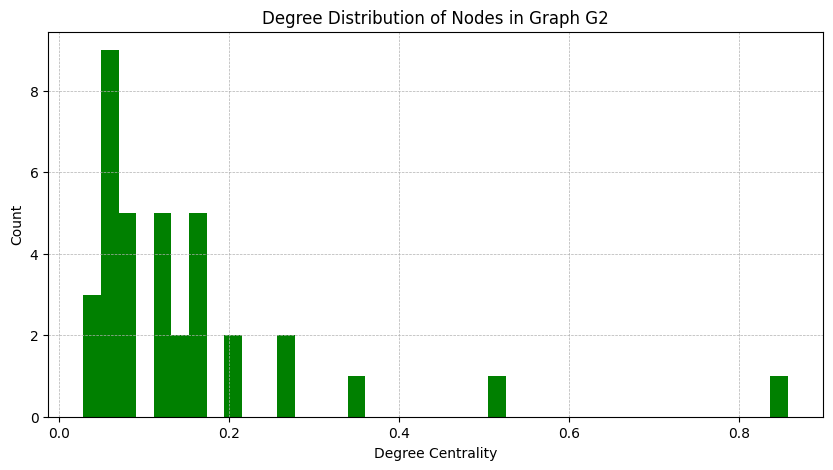

In [31]:
# BOOK 2
degree_values = list(degree_2.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G2')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

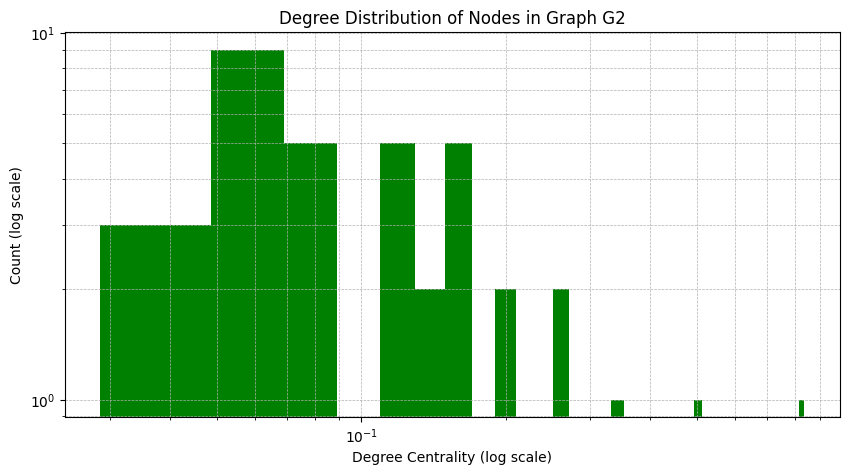

In [30]:
degree_values = list(degree_2.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G2')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


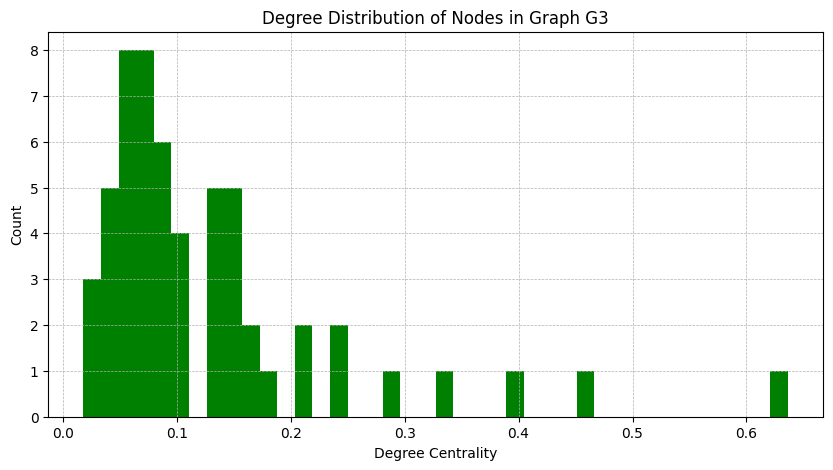

In [32]:
# BOOK 3
degree_values = list(degree_3.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G3')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

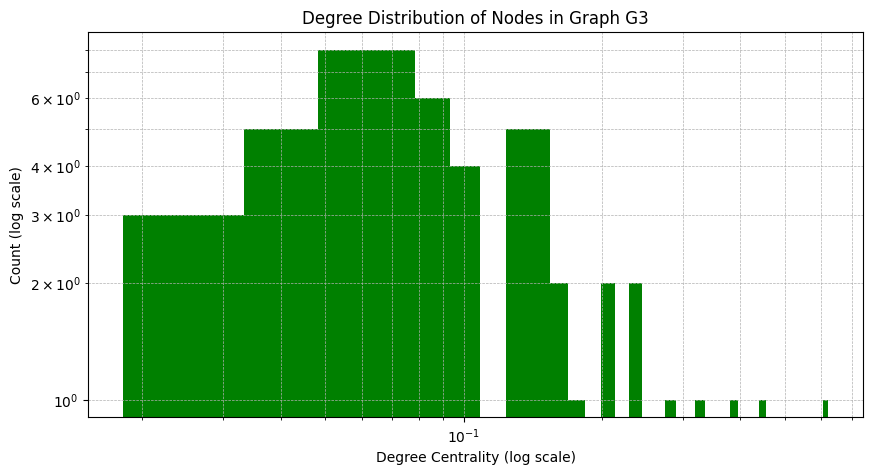

In [33]:
degree_values = list(degree_3.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G3')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


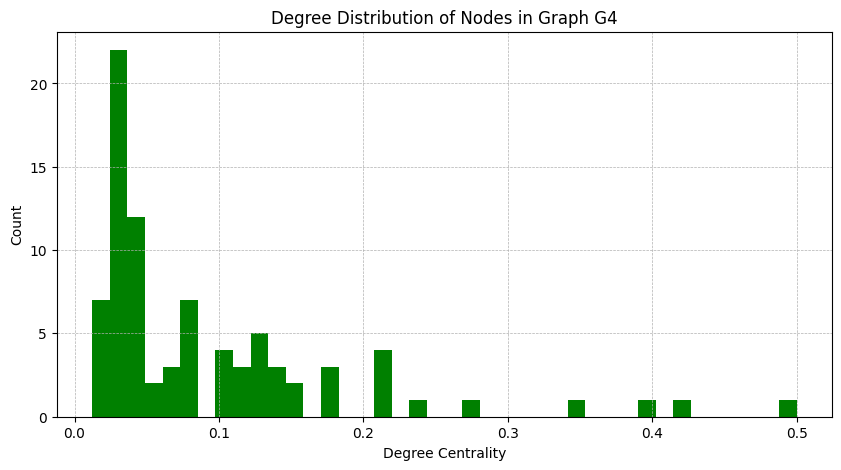

In [34]:
# BOOK 4
degree_values = list(degree_4.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G4')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

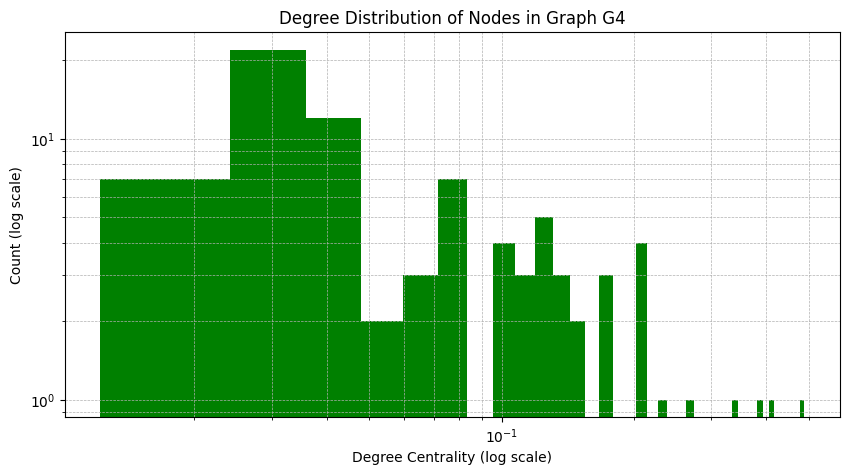

In [35]:
degree_values = list(degree_4.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G4')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

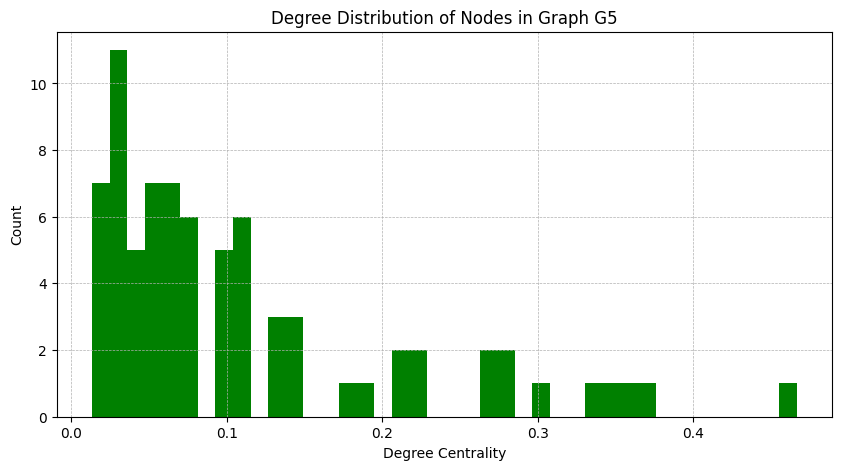

In [36]:
# BOOK 5
degree_values = list(degree_5.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G5')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


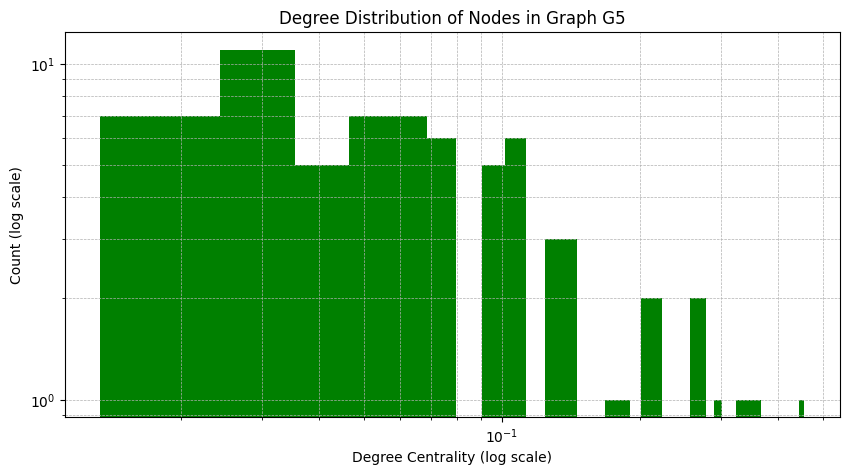

In [37]:
degree_values = list(degree_5.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G5')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()




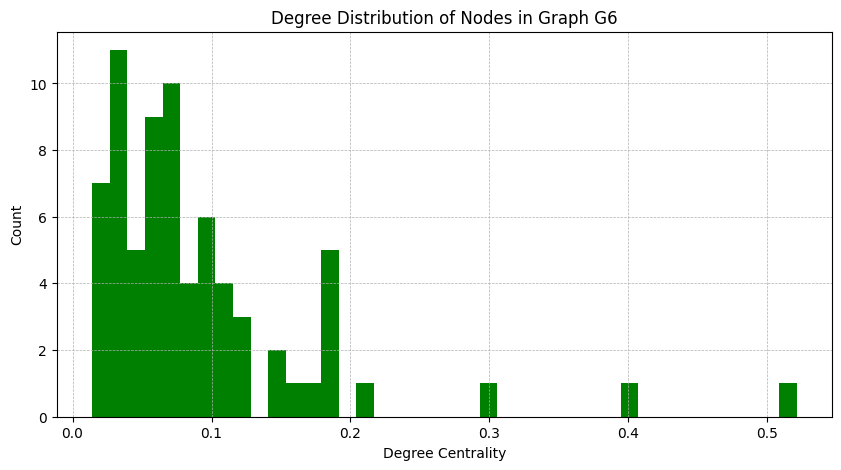

In [38]:
# BOOK 6
degree_values = list(degree_6.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G6')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

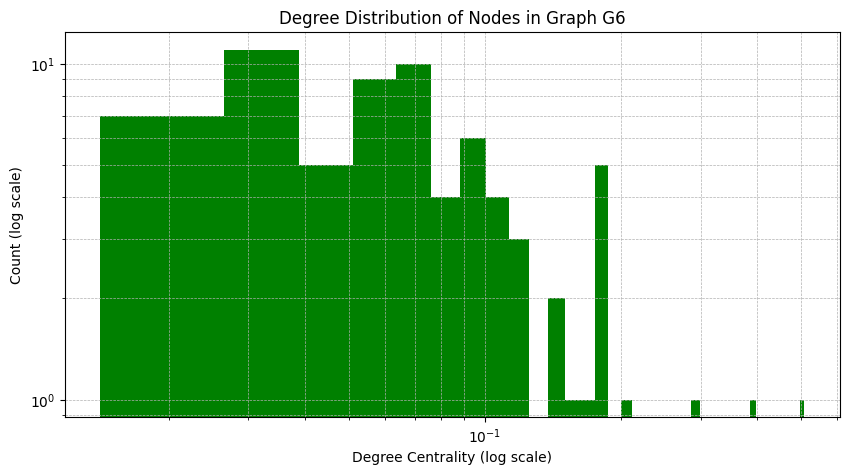

In [39]:
degree_values = list(degree_6.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G6')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()




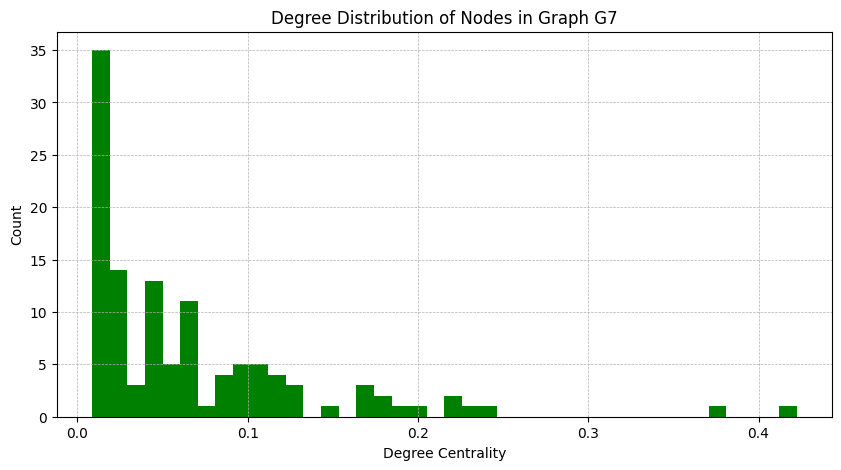

In [40]:
# BOOK 7
degree_values = list(degree_7.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G7')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

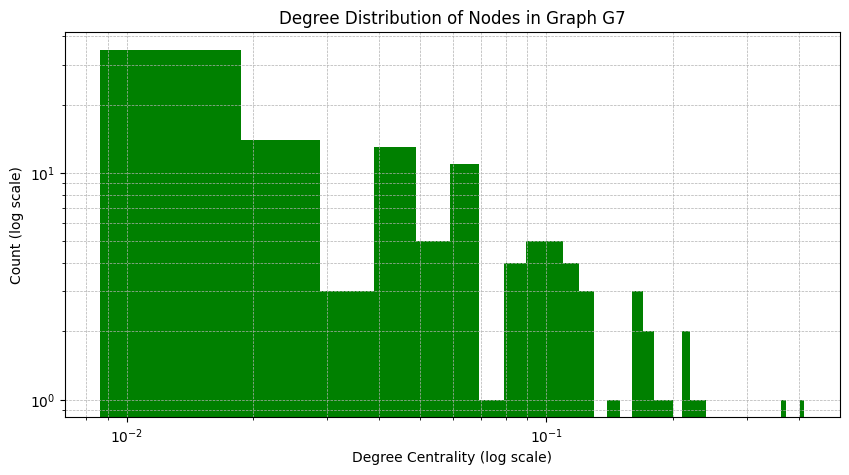

In [41]:
degree_values = list(degree_7.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G7')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()




#### Eigenvector centrality

In [42]:
centrality_1 = nx.eigenvector_centrality(G_1, weight='Weight')
centrality_2 = nx.eigenvector_centrality(G_2, weight='Weight')
centrality_3 = nx.eigenvector_centrality(G_3, weight='Weight')
centrality_4 = nx.eigenvector_centrality(G_4, weight='Weight')
centrality_5 = nx.eigenvector_centrality(G_5, weight='Weight')
centrality_6 = nx.eigenvector_centrality(G_6, weight='Weight')
centrality_7 = nx.eigenvector_centrality(G_7, weight='Weight')

#centrality_1

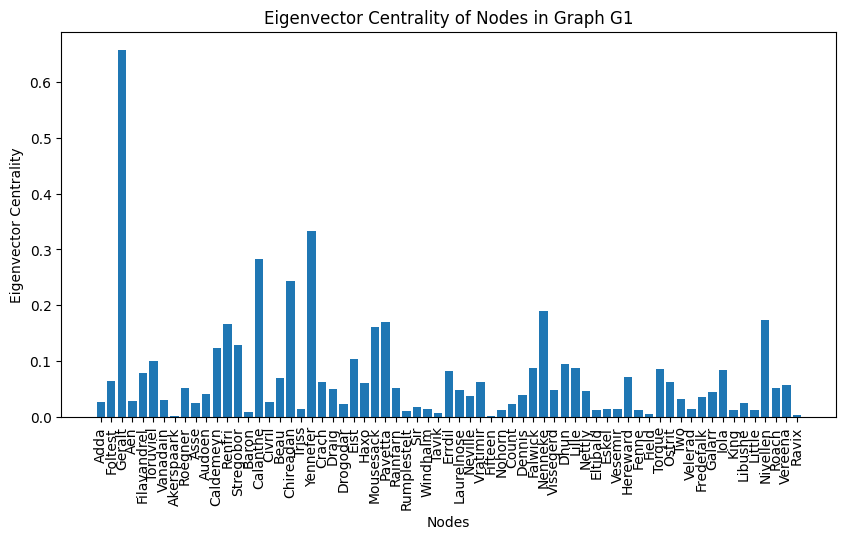

In [43]:
# BOOK 1
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_1.keys()
centralities = centrality_1.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

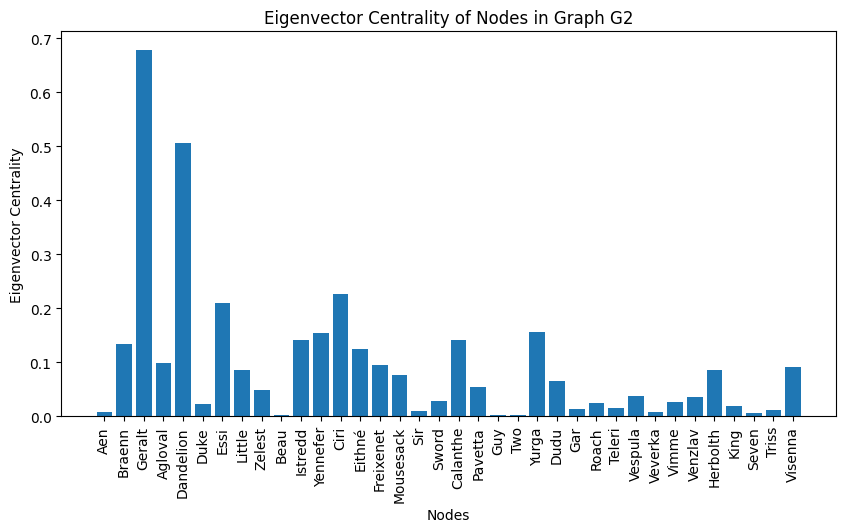

In [44]:
# BOOK 2
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_2.keys()
centralities = centrality_2.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

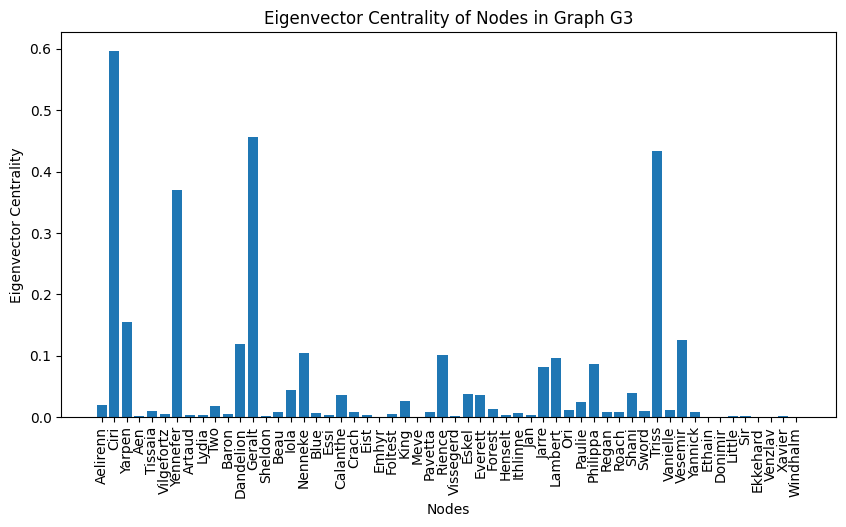

In [45]:
# BOOK 3
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_3.keys()
centralities = centrality_3.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

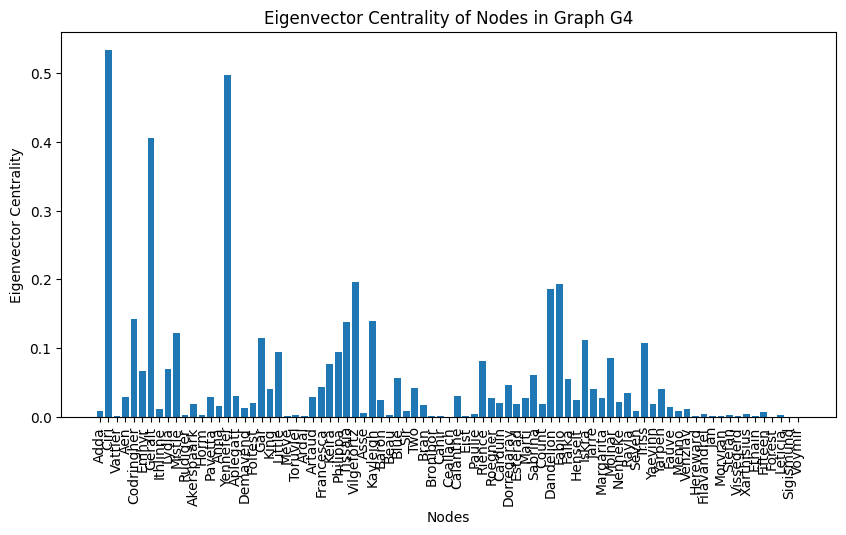

In [46]:
# BOOK 4
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_4.keys()
centralities = centrality_4.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

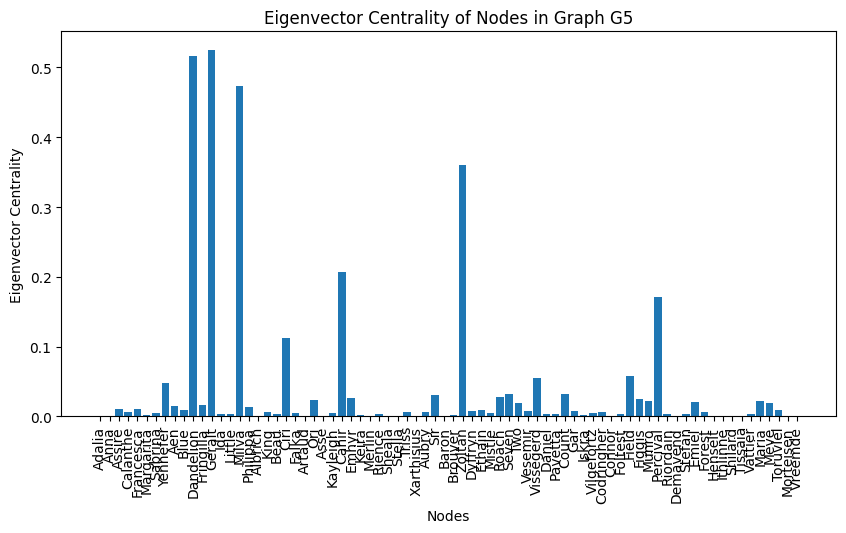

In [47]:
# BOOK 5
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_5.keys()
centralities = centrality_5.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

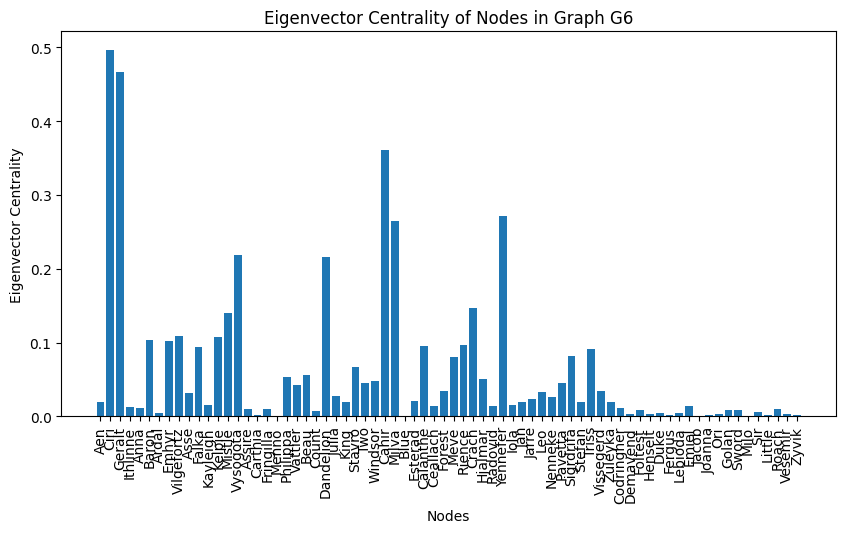

In [48]:
# BOOK 6
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_6.keys()
centralities = centrality_6.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

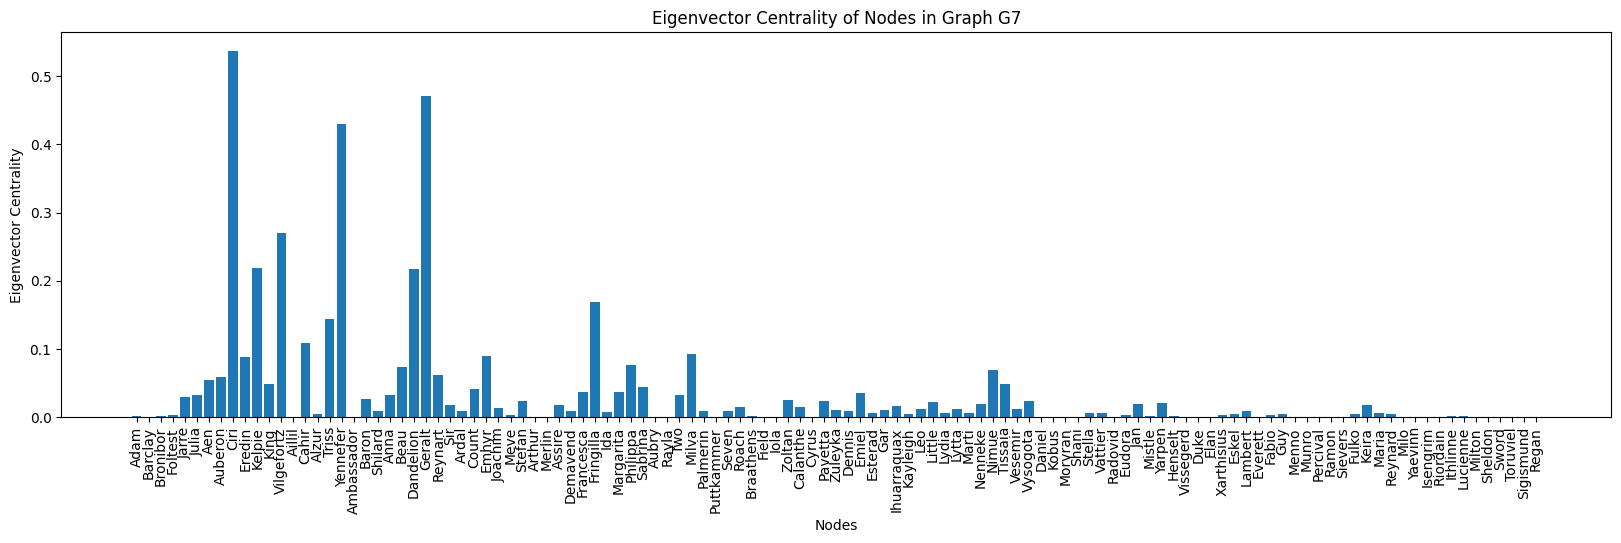

In [53]:
# BOOK 7
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_7.keys()
centralities = centrality_7.values()

plt.figure(figsize=(20,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Closeness centrality

In [54]:
closeness_1 = nx.closeness_centrality(G_1)
closeness_2 = nx.closeness_centrality(G_2)
closeness_3 = nx.closeness_centrality(G_3)
closeness_4 = nx.closeness_centrality(G_4)
closeness_5 = nx.closeness_centrality(G_5)
closeness_6 = nx.closeness_centrality(G_6)
closeness_7 = nx.closeness_centrality(G_7)

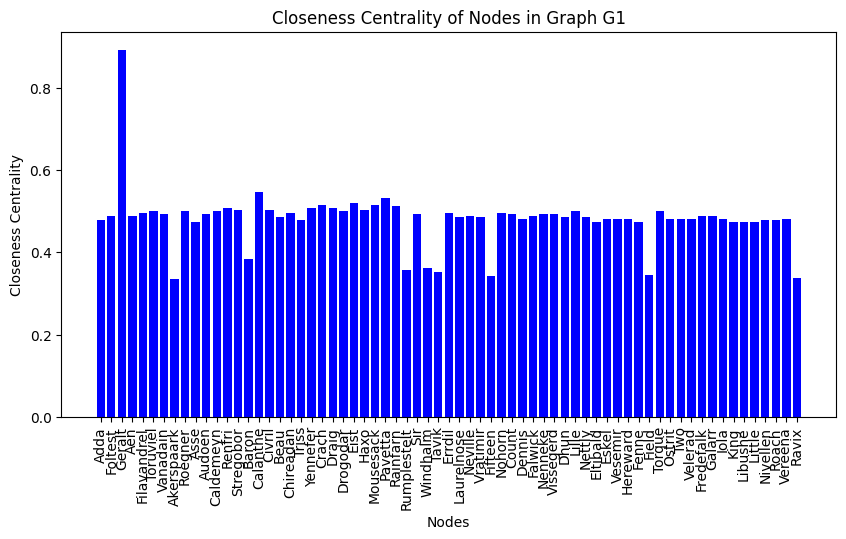

In [55]:
# BOOK 1
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_1.keys()
closeness_centralities = closeness_1.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

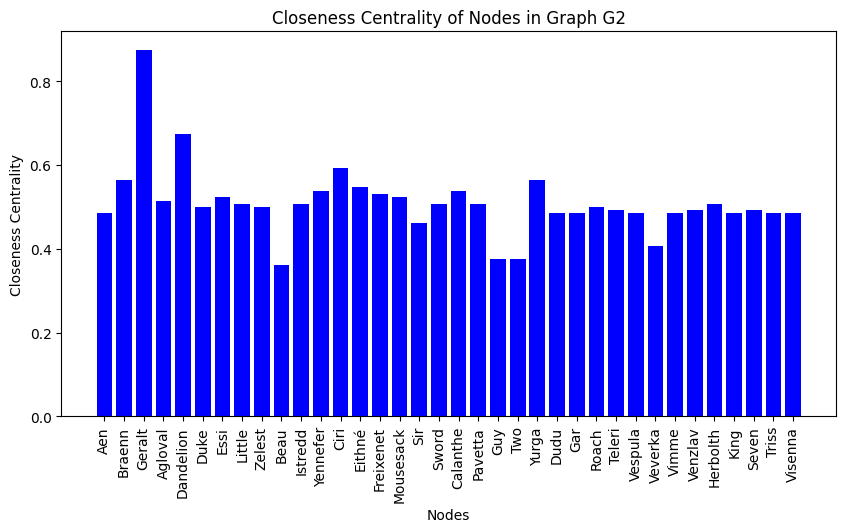

In [56]:
# BOOK 2
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_2.keys()
closeness_centralities = closeness_2.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

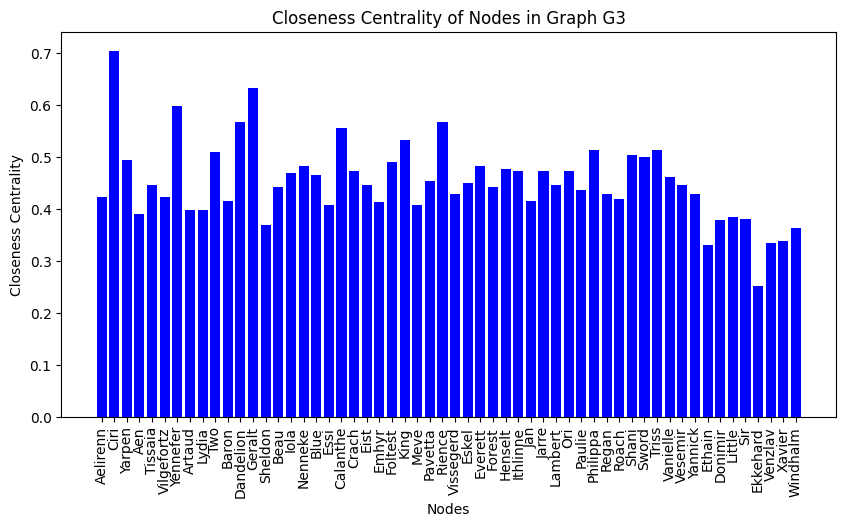

In [57]:
# BOOK 3
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_3.keys()
closeness_centralities = closeness_3.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

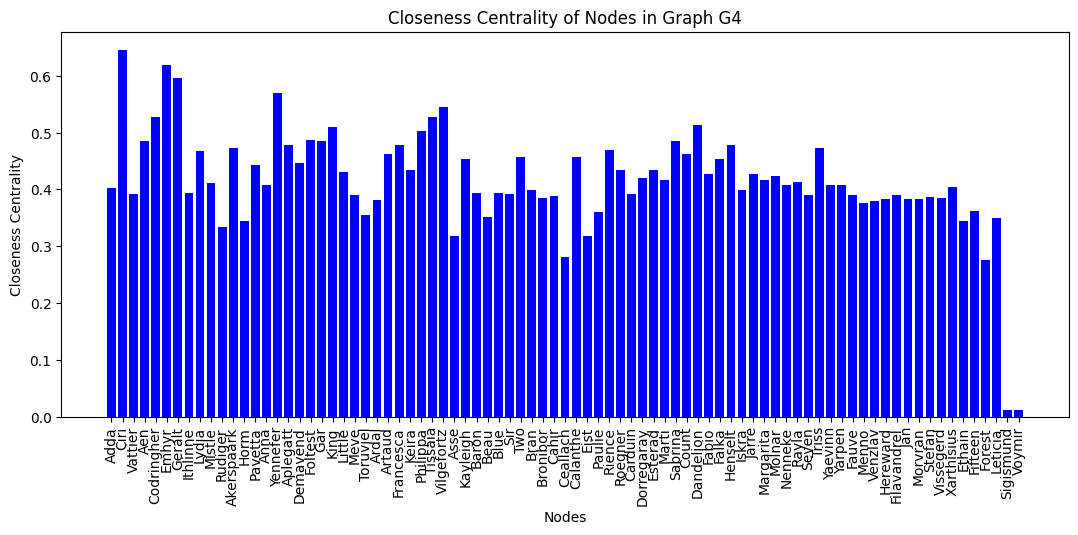

In [62]:
# BOOK 4
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_4.keys()
closeness_centralities = closeness_4.values()

plt.figure(figsize=(13,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

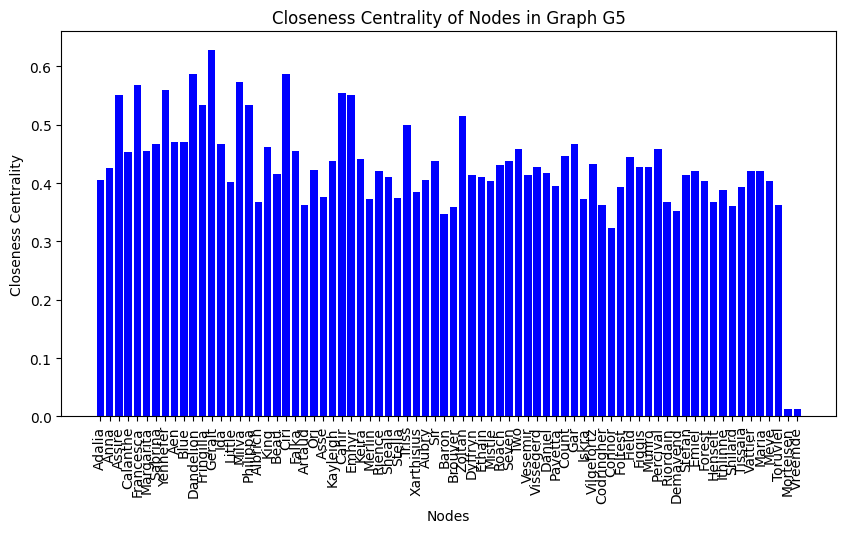

In [59]:
# BOOK 5
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_5.keys()
closeness_centralities = closeness_5.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

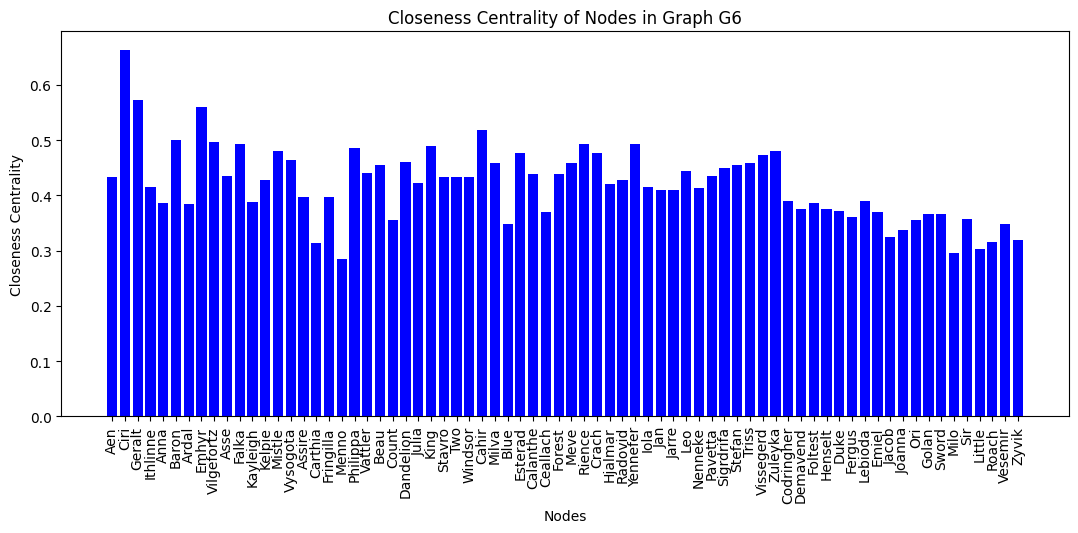

In [63]:
# BOOK 6
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_6.keys()
closeness_centralities = closeness_6.values()

plt.figure(figsize=(13,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

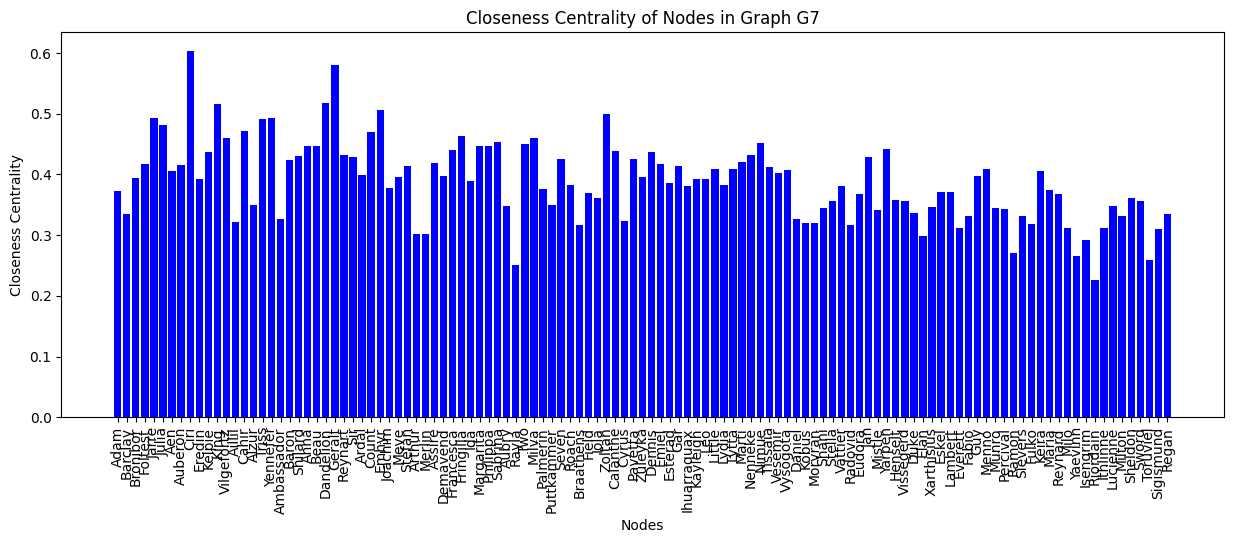

In [66]:
# BOOK 7
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_7.keys()
closeness_centralities = closeness_7.values()

plt.figure(figsize=(15,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Betweenness centrality

In [67]:
betweenness_1 = nx.betweenness_centrality(G_1, normalized=True, weight='Weight')
betweenness_2 = nx.betweenness_centrality(G_2, normalized=True, weight='Weight')
betweenness_3 = nx.betweenness_centrality(G_3, normalized=True, weight='Weight')
betweenness_4 = nx.betweenness_centrality(G_4, normalized=True, weight='Weight')
betweenness_5 = nx.betweenness_centrality(G_5, normalized=True, weight='Weight')
betweenness_6 = nx.betweenness_centrality(G_6, normalized=True, weight='Weight')
betweenness_7 = nx.betweenness_centrality(G_7, normalized=True, weight='Weight')


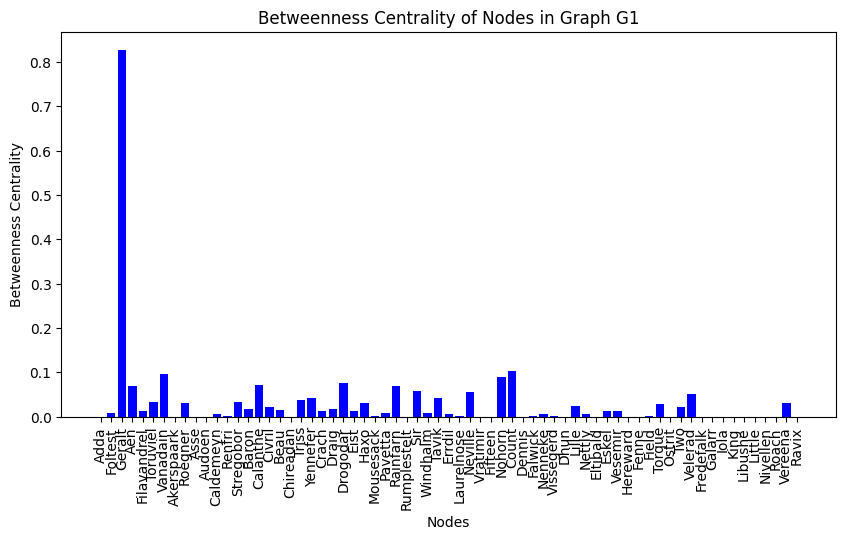

In [68]:
# BOOK 1
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_1.keys()
betweenness_centralities = betweenness_1.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

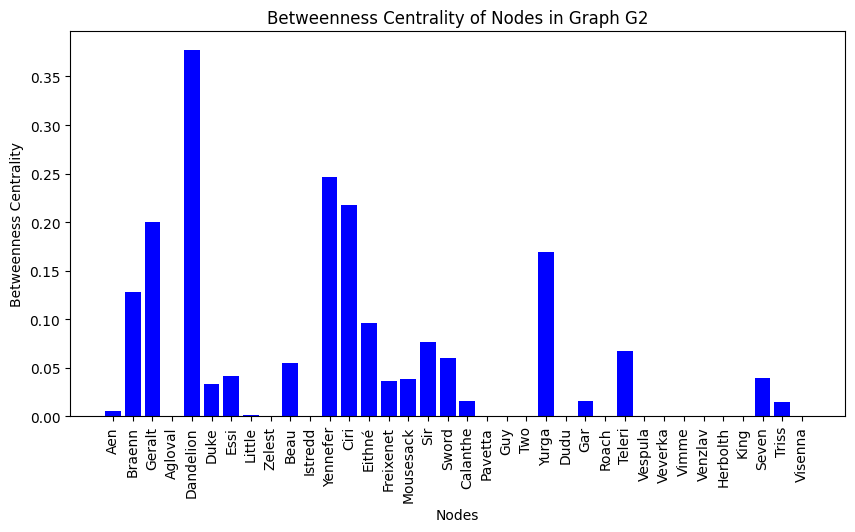

In [69]:
# BOOK 2
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_2.keys()
betweenness_centralities = betweenness_2.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

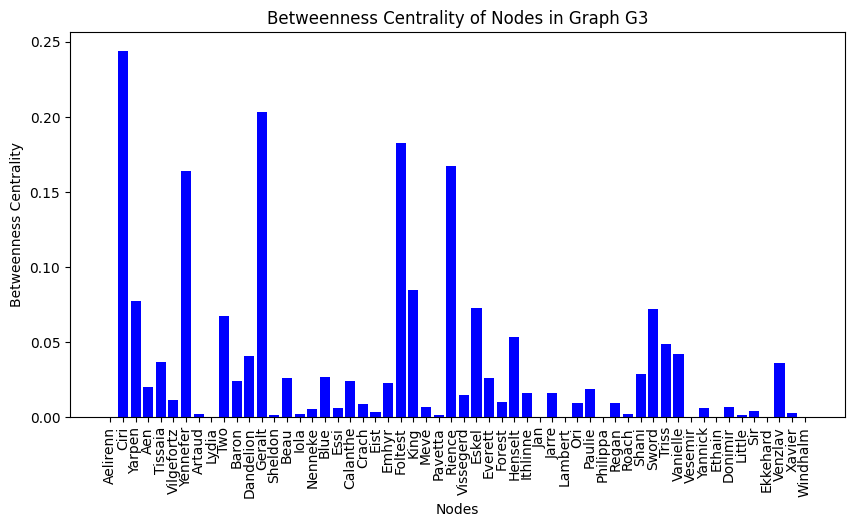

In [70]:
# BOOK 3
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_3.keys()
betweenness_centralities = betweenness_3.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

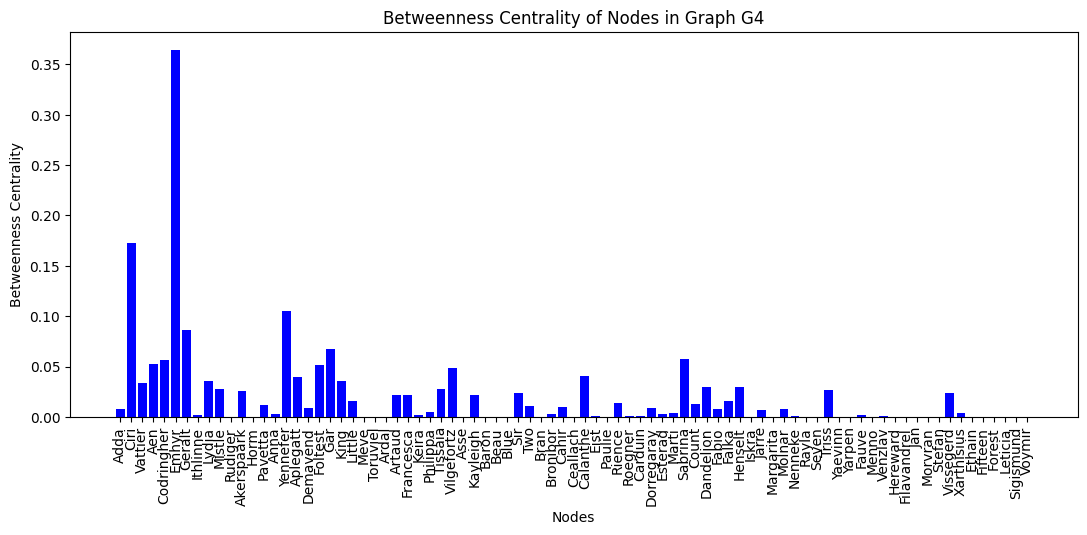

In [75]:
# BOOK 4
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_4.keys()
betweenness_centralities = betweenness_4.values()

plt.figure(figsize=(13,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

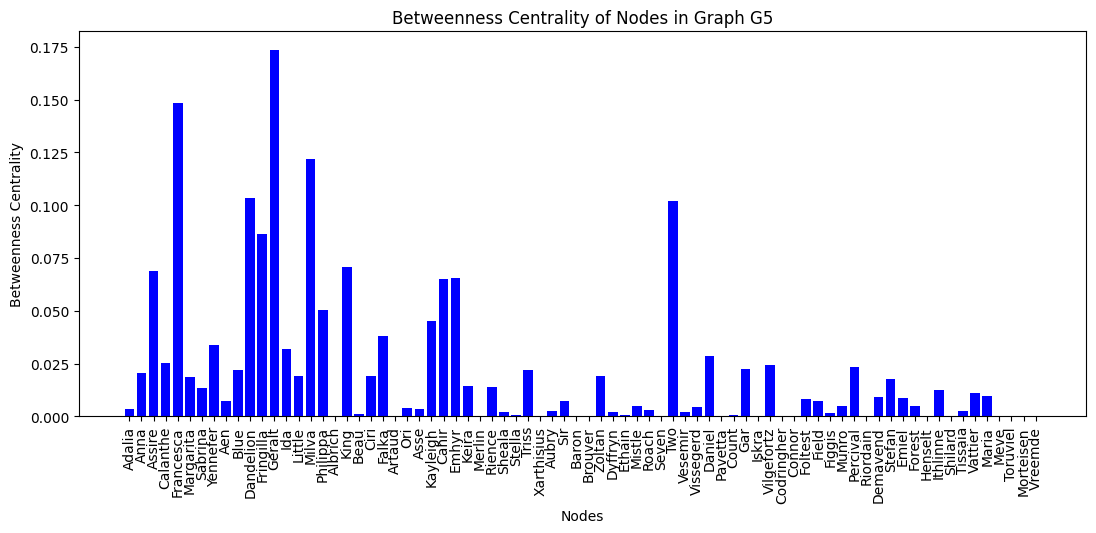

In [73]:
# BOOK 5
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_5.keys()
betweenness_centralities = betweenness_5.values()

plt.figure(figsize=(13,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

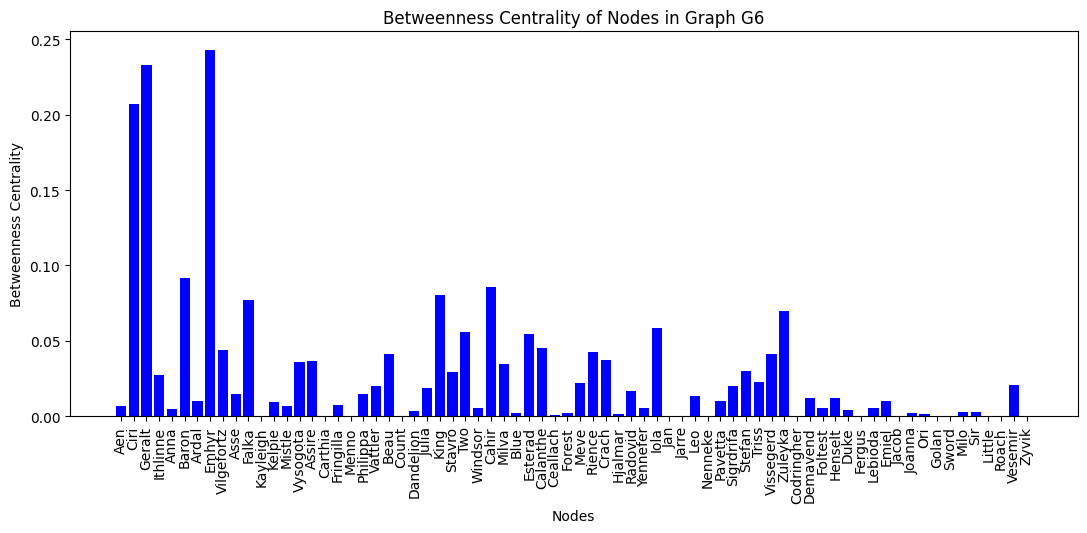

In [76]:
# BOOK 6
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_6.keys()
betweenness_centralities = betweenness_6.values()

plt.figure(figsize=(13,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

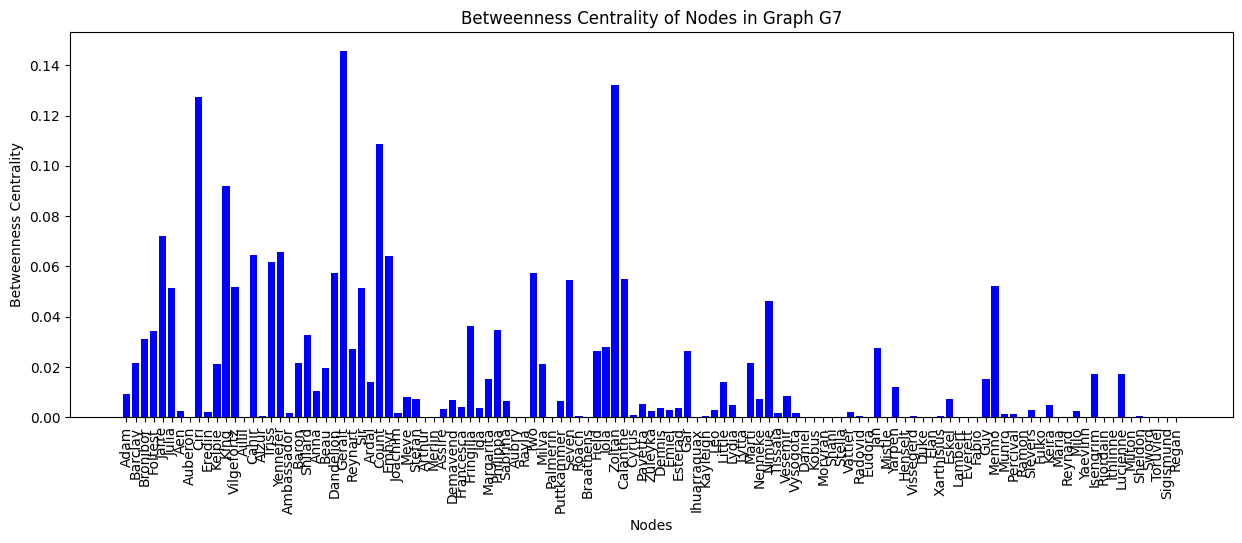

In [79]:
# BOOK 7
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_7.keys()
betweenness_centralities = betweenness_7.values()

plt.figure(figsize=(15,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Cliques

In [ ]:
# BOOK 1
cliques = list(nx.find_cliques(G_1))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Field', 'Torque', 'Lille', 'Filavandrel']
Clique 2: ['Ravix', 'Haxo']
Clique 3: ['Windhalm', 'Calanthe', 'Rainfarn', 'Pavetta', 'Eist']
Clique 4: ['Akerspaark', 'Roegner']
Clique 5: ['Baron', 'Civril']
Clique 6: ['Baron', 'Stregobor']
Clique 7: ['Baron', 'Calanthe']
Clique 8: ['Geralt', 'Eltibald']
Clique 9: ['Geralt', 'Falwick', 'Nenneke', 'Hereward']
Clique 10: ['Geralt', 'Falwick', 'Nenneke', 'Count']
Clique 11: ['Geralt', 'Falwick', 'Dennis', 'Count']
Clique 12: ['Geralt', 'Neville', 'Yennefer', 'Chireadan', 'Errdil']
Clique 13: ['Geralt', 'Neville', 'Yennefer', 'Chireadan', 'Laurelnose']
Clique 14: ['Geralt', 'Nenneke', 'Yennefer', 'Iola']
Clique 15: ['Geralt', 'King']
Clique 16: ['Geralt', 'Renfri', 'Civril']
Clique 17: ['Geralt', 'Renfri', 'Stregobor', 'Caldemeyn', 'Audoen']
Clique 18: ['Geralt', 'Renfri', 'Stregobor', 'Fredefalk']
Clique 19: ['Geralt', 'Torque', 'Toruviel', 'Galarr', 'Vanadain']
Clique 20: ['Geralt', 'Torque', 'Toruviel', 'Lille', 'Filavandrel']
Cli

In [80]:
# BOOK 2
cliques = list(nx.find_cliques(G_2))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Beau', 'Istredd', 'Yennefer']
Clique 2: ['Sir', 'Seven', 'Herbolth']
Clique 3: ['Sir', 'Ciri', 'Freixenet', 'Braenn']
Clique 4: ['Sir', 'Ciri', 'Yurga']
Clique 5: ['Guy', 'Ciri']
Clique 6: ['Two', 'Ciri']
Clique 7: ['Veverka', 'Dandelion']
Clique 8: ['Geralt', 'Freixenet', 'Eithné', 'Venzlav']
Clique 9: ['Geralt', 'Freixenet', 'Eithné', 'Braenn', 'Ciri']
Clique 10: ['Geralt', 'Dandelion', 'Zelest', 'Agloval', 'Duke']
Clique 11: ['Geralt', 'Dandelion', 'Roach']
Clique 12: ['Geralt', 'Dandelion', 'Essi', 'Little', 'Agloval']
Clique 13: ['Geralt', 'Dandelion', 'Essi', 'Teleri']
Clique 14: ['Geralt', 'Dandelion', 'Essi', 'Yennefer']
Clique 15: ['Geralt', 'Dandelion', 'Vespula']
Clique 16: ['Geralt', 'Dandelion', 'Dudu']
Clique 17: ['Geralt', 'Dandelion', 'Gar']
Clique 18: ['Geralt', 'Dandelion', 'Braenn', 'Ciri']
Clique 19: ['Geralt', 'Dandelion', 'Braenn', 'Sword']
Clique 20: ['Geralt', 'Dandelion', 'Sword', 'Little']
Clique 21: ['Geralt', 'Dandelion', 'Ciri', 'Calanthe']
Cliq

In [81]:
# BOOK 3
cliques = list(nx.find_cliques(G_3))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Xavier', 'Yarpen', 'Paulie']
Clique 2: ['Xavier', 'Yarpen', 'Regan']
Clique 3: ['Essi', 'Dandelion', 'Blue', 'Yennefer']
Clique 4: ['Sir', 'Dandelion', 'Rience']
Clique 5: ['Venzlav', 'Foltest']
Clique 6: ['Venzlav', 'Ekkehard']
Clique 7: ['Emhyr', 'Vilgefortz', 'Vissegerd']
Clique 8: ['Emhyr', 'Ithlinne']
Clique 9: ['Emhyr', 'Foltest', 'Meve', 'Vissegerd', 'Henselt']
Clique 10: ['Emhyr', 'Foltest', 'Meve', 'Vissegerd', 'Calanthe']
Clique 11: ['Emhyr', 'Foltest', 'Crach', 'Henselt']
Clique 12: ['Emhyr', 'Foltest', 'Crach', 'Calanthe']
Clique 13: ['Little', 'Shani', 'Dandelion', 'Rience']
Clique 14: ['Donimir', 'Dandelion', 'Two']
Clique 15: ['Donimir', 'Dandelion', 'Sheldon']
Clique 16: ['Artaud', 'Tissaia', 'Lydia', 'Vilgefortz', 'Yennefer']
Clique 17: ['Artaud', 'Tissaia', 'Lydia', 'Two']
Clique 18: ['Vissegerd', 'Rience', 'Calanthe', 'Foltest']
Clique 19: ['Baron', 'Dandelion', 'Sheldon']
Clique 20: ['Baron', 'Dandelion', 'Geralt']
Clique 21: ['Tissaia', 'Yennefer', 'Vil

In [82]:
# BOOK 4
cliques = list(nx.find_cliques(G_4))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Ceallach', 'Cahir', 'Vattier']
Clique 2: ['Cahir', 'Emhyr', 'Vattier']
Clique 3: ['Horm', 'Codringher', 'Akerspaark']
Clique 4: ['Venzlav', 'Triss', 'Dandelion', 'Geralt']
Clique 5: ['Forest', 'Vissegerd']
Clique 6: ['Ardal', 'Emhyr']
Clique 7: ['Hereward', 'Demavend', 'Emhyr']
Clique 8: ['Toruviel', 'Gar', 'Aplegatt']
Clique 9: ['Toruviel', 'Gar', 'Yaevinn']
Clique 10: ['Voymir', 'Sigismund']
Clique 11: ['Stefan', 'Vattier', 'Emhyr']
Clique 12: ['Eist', 'Pavetta', 'Calanthe']
Clique 13: ['Fauve', 'Gar', 'Dandelion', 'Geralt']
Clique 14: ['Menno', 'Dandelion', 'Geralt']
Clique 15: ['Ithlinne', 'Codringher', 'Geralt', 'Pavetta', 'Falka']
Clique 16: ['Ithlinne', 'Codringher', 'Geralt', 'Aen']
Clique 17: ['Esterad', 'Vilgefortz', 'Carduin']
Clique 18: ['Esterad', 'Vilgefortz', 'Geralt', 'Triss']
Clique 19: ['Esterad', 'Vilgefortz', 'Geralt', 'Emhyr']
Clique 20: ['Esterad', 'Sabrina', 'Carduin']
Clique 21: ['Esterad', 'Sabrina', 'Geralt', 'Triss']
Clique 22: ['Esterad', 'Sabrin

In [83]:
# BOOK 5
cliques = list(nx.find_cliques(G_5))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Vreemde', 'Morteisen']
Clique 2: ['Ori', 'Maria', 'Milva']
Clique 3: ['Ori', 'Yennefer', 'Triss', 'Philippa']
Clique 4: ['Ori', 'Yennefer', 'Artaud']
Clique 5: ['Ori', 'Yennefer', 'Milva']
Clique 6: ['Ori', 'Stefan', 'Philippa']
Clique 7: ['Ori', 'Stefan', 'Milva']
Clique 8: ['Riordain', 'Dandelion']
Clique 9: ['Mistle', 'Two', 'Cahir']
Clique 10: ['Mistle', 'Two', 'Falka']
Clique 11: ['Mistle', 'Ciri', 'Cahir']
Clique 12: ['Mistle', 'Ciri', 'Falka', 'Kayleigh']
Clique 13: ['Toruviel', 'Milva']
Clique 14: ['Shilard', 'Francesca']
Clique 15: ['Stefan', 'Philippa', 'Emhyr']
Clique 16: ['Stefan', 'Milva', 'Vattier']
Clique 17: ['Stefan', 'Milva', 'Emhyr']
Clique 18: ['Little', 'Aen', 'Milva']
Clique 19: ['Little', 'Kayleigh', 'Asse']
Clique 20: ['Little', 'Kayleigh', 'Falka']
Clique 21: ['Geralt', 'Maria', 'Zoltan', 'Milva']
Clique 22: ['Geralt', 'Dandelion', 'Sir', 'Count', 'Vissegerd']
Clique 23: ['Geralt', 'Dandelion', 'Sir', 'Aubry']
Clique 24: ['Geralt', 'Dandelion', 'Sir

In [84]:
# BOOK 6
cliques = list(nx.find_cliques(G_6))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Fergus', 'Emhyr']
Clique 2: ['Ceallach', 'Cahir', 'Rience', 'Meve']
Clique 3: ['Ceallach', 'Cahir', 'Rience', 'Vattier']
Clique 4: ['Sir', 'Vilgefortz', 'Ithlinne']
Clique 5: ['Sir', 'Two']
Clique 6: ['Count', 'Dandelion', 'Baron']
Clique 7: ['Count', 'Radovid']
Clique 8: ['Ori', 'Rience', 'Falka']
Clique 9: ['Ardal', 'Vilgefortz']
Clique 10: ['Ardal', 'Emhyr']
Clique 11: ['Lebioda', 'Emhyr', 'Esterad', 'King', 'Zuleyka']
Clique 12: ['Little', 'Stavro']
Clique 13: ['Roach', 'Milva']
Clique 14: ['Menno', 'Assire']
Clique 15: ['Milo', 'Nenneke', 'Iola']
Clique 16: ['Ithlinne', 'Esterad']
Clique 17: ['Ithlinne', 'Geralt', 'Vilgefortz']
Clique 18: ['Ithlinne', 'Geralt', 'Aen']
Clique 19: ['Sword', 'Geralt']
Clique 20: ['Emiel', 'Milva', 'Geralt']
Clique 21: ['Demavend', 'Emhyr', 'Henselt', 'King', 'Foltest']
Clique 22: ['King', 'Radovid']
Clique 23: ['King', 'Baron', 'Geralt']
Clique 24: ['King', 'Philippa', 'Zuleyka']
Clique 25: ['King', 'Emhyr', 'Esterad', 'Foltest']
Clique 2

In [85]:
# BOOK 7
cliques = list(nx.find_cliques(G_7))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Sievers', 'Menno', 'Field']
Clique 2: ['Sievers', 'Seven']
Clique 3: ['Sir', 'Geralt', 'Jarre', 'Anna']
Clique 4: ['Sir', 'Geralt', 'Dandelion', 'Reynart', 'Anna', 'Julia']
Clique 5: ['Sir', 'Geralt', 'Dandelion', 'Reynart', 'Cahir', 'Milva']
Clique 6: ['Sir', 'Arthur', 'Merlin']
Clique 7: ['Sir', 'Seven', 'Milva']
Clique 8: ['Ramon', 'Field']
Clique 9: ['Regan', 'Zoltan']
Clique 10: ['Joachim', 'Vilgefortz', 'Ardal', 'Emhyr', 'Stefan', 'Count']
Clique 11: ['Joachim', 'Vilgefortz', 'Ardal', 'Emhyr', 'Stefan', 'Yennefer']
Clique 12: ['Braathens', 'Vilgefortz']
Clique 13: ['Kobus', 'Count']
Clique 14: ['Ardal', 'Meve', 'King']
Clique 15: ['Ardal', 'King', 'Emhyr', 'Yennefer']
Clique 16: ['Riordain', 'Isengrim']
Clique 17: ['Mistle', 'Dandelion']
Clique 18: ['Yaevinn', 'Iola']
Clique 19: ['Munro', 'Guy', 'Zoltan']
Clique 20: ['Munro', 'Guy', 'Field']
Clique 21: ['Toruviel', 'Lucienne']
Clique 22: ['Fabio', 'Yennefer']
Clique 23: ['Lambert', 'Eskel', 'Geralt', 'Vesemir']
Clique

#### K core

In [86]:
# Compute the k-core of the graph
k = 3 # replace with your desired k value

k_core_1 = nx.k_core(G_1, k)
k_core_2 = nx.k_core(G_2, k)
k_core_3 = nx.k_core(G_3, k)
k_core_4 = nx.k_core(G_4, k)
k_core_5 = nx.k_core(G_5, k)
k_core_6 = nx.k_core(G_6, k)
k_core_7 = nx.k_core(G_7, k)

# Print the nodes in the k-core
print(f"The nodes in the {k}-core are: {k_core_1.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_2.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_3.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_4.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_5.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_6.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_7.nodes()}")


The nodes in the 3-core are: ['Foltest', 'Geralt', 'Aen', 'Filavandrel', 'Toruviel', 'Vanadain', 'Roegner', 'Audoen', 'Caldemeyn', 'Renfri', 'Stregobor', 'Baron', 'Calanthe', 'Civril', 'Beau', 'Chireadan', 'Yennefer', 'Crach', 'Draig', 'Drogodar', 'Eist', 'Haxo', 'Mousesack', 'Pavetta', 'Rainfarn', 'Windhalm', 'Tavik', 'Errdil', 'Laurelnose', 'Neville', 'Vratimir', 'Fifteen', 'Nohorn', 'Count', 'Dennis', 'Falwick', 'Nenneke', 'Vissegerd', 'Dhun', 'Lille', 'Nettly', 'Eskel', 'Vesemir', 'Hereward', 'Field', 'Torque', 'Ostrit', 'Two', 'Velerad', 'Fredefalk', 'Galarr', 'Iola']
The nodes in the 3-core are: ['Braenn', 'Geralt', 'Agloval', 'Dandelion', 'Duke', 'Essi', 'Little', 'Zelest', 'Istredd', 'Yennefer', 'Ciri', 'Eithné', 'Freixenet', 'Mousesack', 'Sir', 'Sword', 'Calanthe', 'Pavetta', 'Yurga', 'Roach', 'Teleri', 'Venzlav', 'Herbolth', 'Seven']
The nodes in the 3-core are: ['Ciri', 'Yarpen', 'Aen', 'Tissaia', 'Vilgefortz', 'Yennefer', 'Artaud', 'Lydia', 'Two', 'Baron', 'Dandelion', 'Ger

#### Clustering

In [87]:
clustering_coefficient_1 = nx.clustering(G_1)
clustering_coefficient_2 = nx.clustering(G_2)
clustering_coefficient_3 = nx.clustering(G_3)
clustering_coefficient_4 = nx.clustering(G_4)
clustering_coefficient_5 = nx.clustering(G_5)
clustering_coefficient_6 = nx.clustering(G_6)
clustering_coefficient_7 = nx.clustering(G_7)

# Print the clustering coefficient for each node
#for node, coeff in clustering_coefficient.items():
#    print(f"Node {node} has clustering coefficient {coeff}")


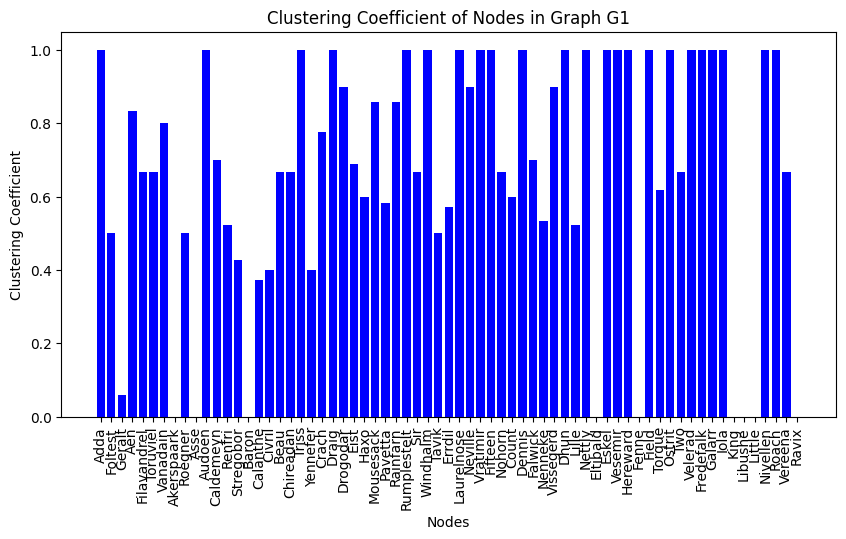

In [88]:
# BOOK 1
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_1.keys()
clustering_values = clustering_coefficient_1.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

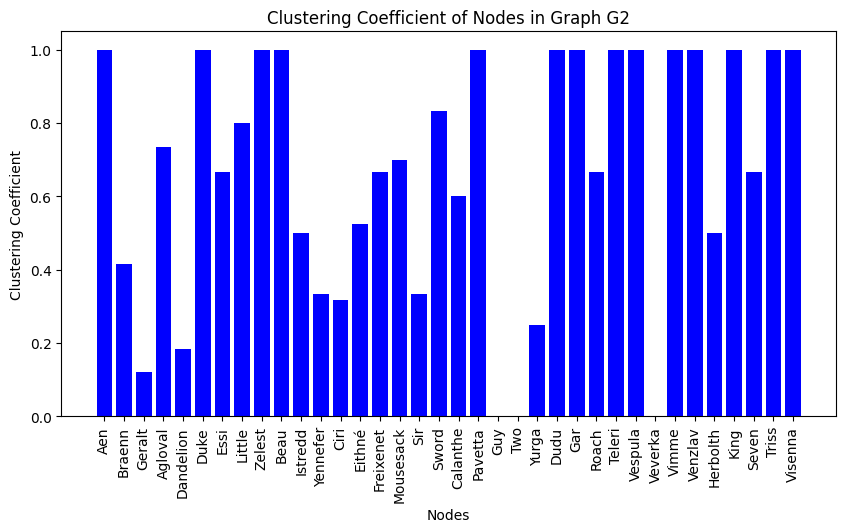

In [89]:
# BOOK 2
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_2.keys()
clustering_values = clustering_coefficient_2.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

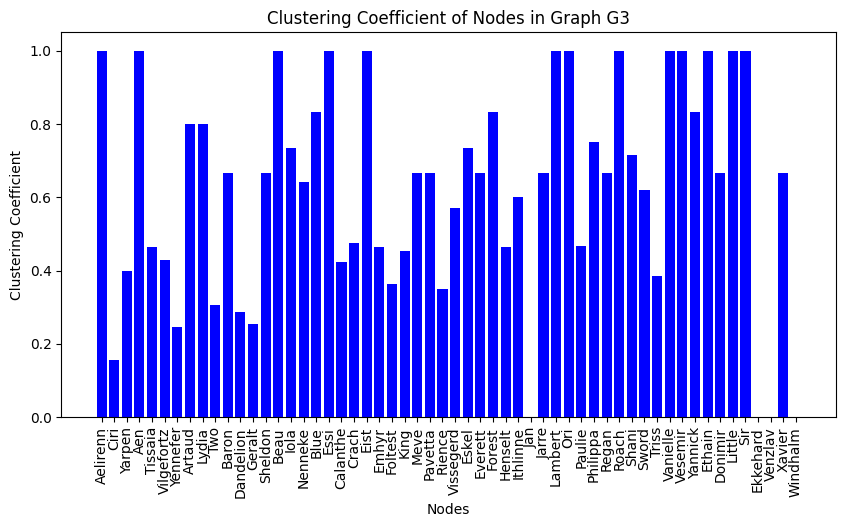

In [90]:
# BOOK 3
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_3.keys()
clustering_values = clustering_coefficient_3.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

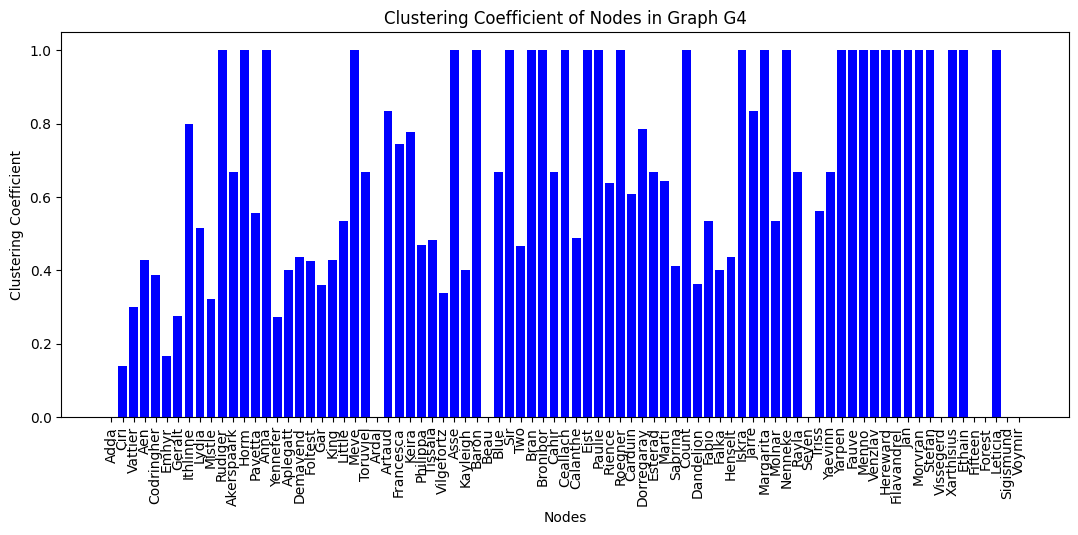

In [92]:
# BOOK 4

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_4.keys()
clustering_values = clustering_coefficient_4.values()

plt.figure(figsize=(13,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

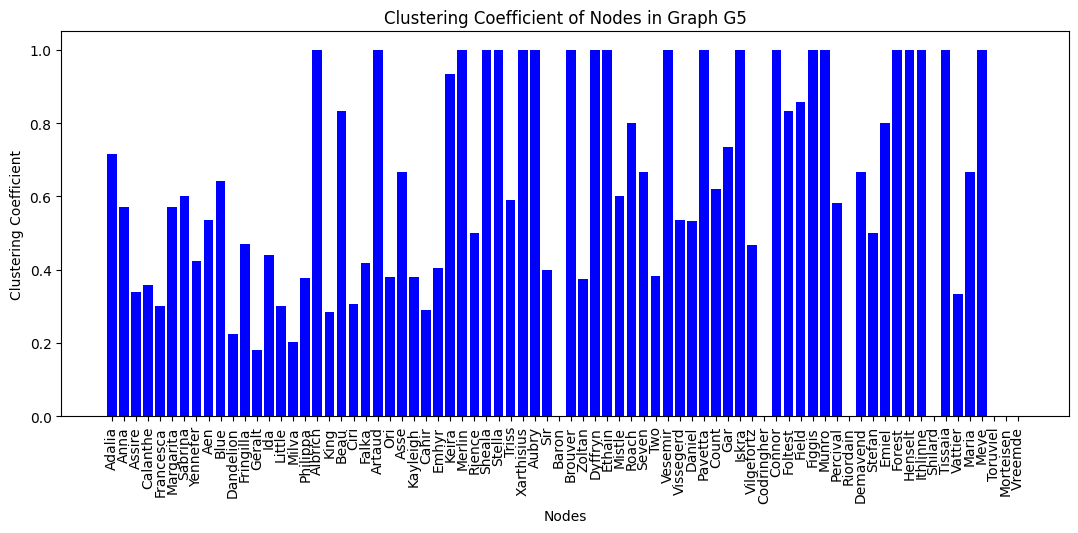

In [94]:
# BOOK 5

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_5.keys()
clustering_values = clustering_coefficient_5.values()

plt.figure(figsize=(13,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

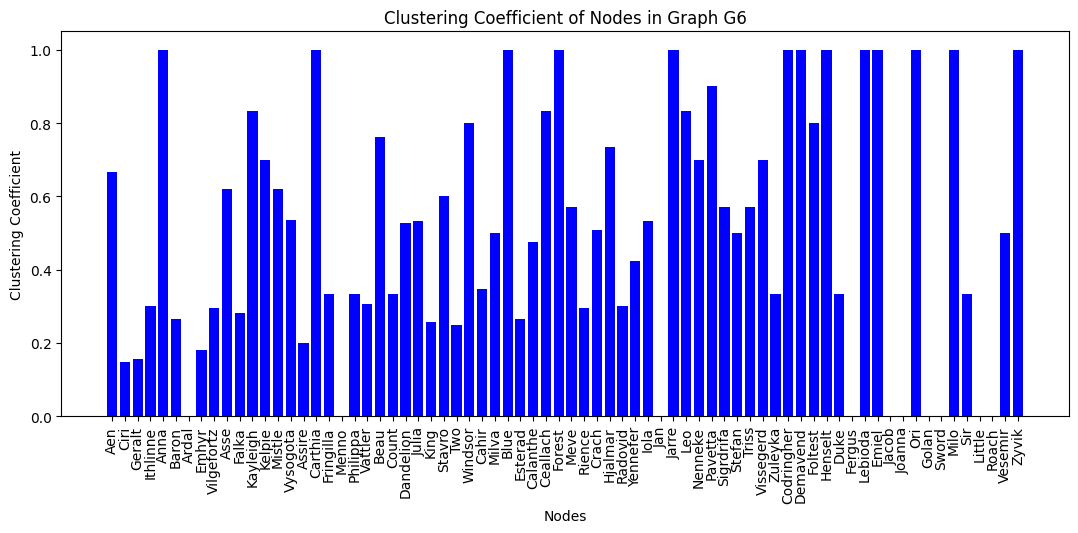

In [97]:
# BOOK 6

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_6.keys()
clustering_values = clustering_coefficient_6.values()

plt.figure(figsize=(13,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

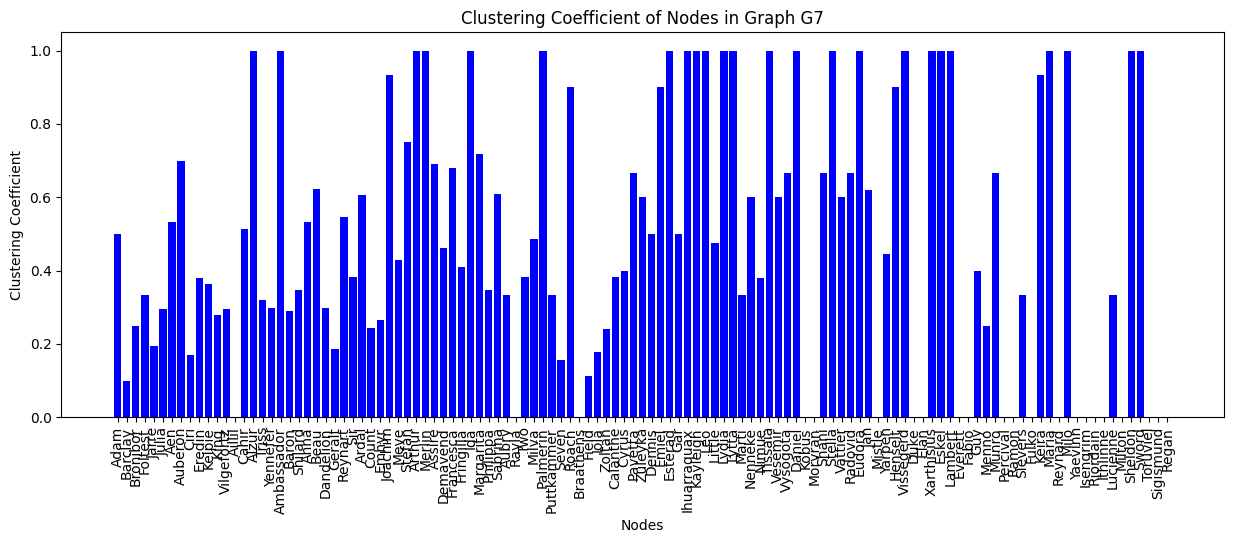

In [98]:
# BOOK 7

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_7.keys()
clustering_values = clustering_coefficient_7.values()

plt.figure(figsize=(15,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Structural equivalence

In [100]:
#import sys
#np.set_printoptions(threshold=sys.maxsize) # to print the whole matrix without truncation

# Compute adjacency matrix
A_1 = nx.adjacency_matrix(G_1)
A_2 = nx.adjacency_matrix(G_2)
A_3 = nx.adjacency_matrix(G_3)
A_4 = nx.adjacency_matrix(G_4)
A_5 = nx.adjacency_matrix(G_5)
A_6 = nx.adjacency_matrix(G_6)
A_7 = nx.adjacency_matrix(G_7)


def structural_equiv(A):
  return np.inner(A.toarray(), A.toarray()) / (np.linalg.norm(A.toarray(), axis=1) * np.linalg.norm(A.toarray(), axis=1)[:, None])


# Compute structural equivalence (cosine similarity of adjacency matrix rows)
structural_equivalence_1 = structural_equiv(A_1)
structural_equivalence_2 = structural_equiv(A_2)
structural_equivalence_3 = structural_equiv(A_3)
structural_equivalence_4 = structural_equiv(A_4)
structural_equivalence_5 = structural_equiv(A_5)
structural_equivalence_6 = structural_equiv(A_6)
structural_equivalence_7 = structural_equiv(A_7)


print(structural_equivalence_7)
# put a threshold on values to select only couples of nodes with a consistent number of common neighbours

[[1.         0.2        0.63245553 ... 0.         0.         0.        ]
 [0.2        1.         0.15811388 ... 0.         0.         0.        ]
 [0.63245553 0.15811388 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


#### Assortative mixing by degree

In [ ]:
# A positive value indicates a correlation between nodes of similar degree (high with high, low with low)
# while a negative value indicates a correlation between nodes of different degree
r_1 = nx.degree_assortativity_coefficient(G_1)

print("Degree assortativity coefficient:", r_1)
# Negative result -> high degree nodes interact more with low degree nodes
# a star-like graph (see picture on the slide)

Degree assortativity coefficient: -0.2505522119404024


In [102]:
r_1 = nx.degree_assortativity_coefficient(G_1)
r_2 = nx.degree_assortativity_coefficient(G_2)
r_3 = nx.degree_assortativity_coefficient(G_3)
r_4 = nx.degree_assortativity_coefficient(G_4)
r_5 = nx.degree_assortativity_coefficient(G_5)
r_6 = nx.degree_assortativity_coefficient(G_6)
r_7 = nx.degree_assortativity_coefficient(G_7)

print("Degree assortativity coefficient book 1:", r_1)
print("Degree assortativity coefficient book 2:", r_2)
print("Degree assortativity coefficient book 3:", r_3)
print("Degree assortativity coefficient book 4:", r_4)
print("Degree assortativity coefficient book 5:", r_5)
print("Degree assortativity coefficient book 6:", r_6)
print("Degree assortativity coefficient book 7:", r_7)

Degree assortativity coefficient book 1: -0.2505522119404024
Degree assortativity coefficient book 2: -0.3918270416897044
Degree assortativity coefficient book 3: -0.2367110202879257
Degree assortativity coefficient book 4: -0.25321777572121285
Degree assortativity coefficient book 5: -0.24594744728989135
Degree assortativity coefficient book 6: -0.1854984742624426
Degree assortativity coefficient book 7: -0.14474127323748
